## EDA

Objetivos del negocio:

1. Mejorar la Calidad del servicio
2. Explorar Oportunidades de crecimiento
3. Personalización de servicios y retención de clientes

#### Exploración inicial de hojas para "Mejorar la Calidad del Servicio"
Comenzamos cargando las hojas relacionadas con la calidad del servicio. En este caso:  
1. **Acc_vel_loc_sinrangos**: Velocidades y accesos por localidad.  
2. **Velocidad_sin_Rangos**: Velocidades y accesos trimestrales por provincia.  
3. **Velocidad % por prov**: Porcentajes de velocidad por provincia.  

In [3]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargamos los dataframes
df_acc_vel_loc_sinrangos= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Acc_vel_loc_sinrangos.csv")
df_velocidad_sin_rangos= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Velocidad_sin_rangos.csv")
df_velocidad_porciento_prov= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Velocidad % por prov.csv")

#### Comenzamos el analisis con el Dataframe: **df_acc_vel_loc_sinrangos**

In [14]:
print("Resumen del DataFrame: df_acc_vel_loc_sinrangos")
df_acc_vel_loc_sinrangos.info()  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_acc_vel_loc_sinrangos.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_acc_vel_loc_sinrangos.head())  # Primeras filas para una vista general

Resumen del DataFrame: df_acc_vel_loc_sinrangos
<class 'pandas.core.frame.DataFrame'>
Index: 18856 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18856 non-null  object 
 1   Partido/Ciudad    18856 non-null  object 
 2   Localidad         18856 non-null  object 
 3   link Indec        18856 non-null  object 
 4   Velocidad (Mbps)  18856 non-null  float64
 5   Accesos           18856 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.0+ MB

Estadísticas descriptivas:


,Provincia,Partido/Ciudad,Localidad,link Indec,Velocidad (Mbps),Accesos
count,18856,18856,18856,18856,18856.000000,18856.000000
unique,24,435,2781,2665,NaN,NaN
top,BUENOS AIRES,General San Martín,OTROS,6371010,NaN,NaN
freq,7172,460,82,367,NaN,NaN
mean,NaN,NaN,NaN,NaN,66.878501,613.157032
std,NaN,NaN,NaN,NaN,179.012417,6283.364331
min,NaN,NaN,NaN,NaN,0.000000,-830.000000
25%,NaN,NaN,NaN,NaN,3.000000,3.000000
50%,NaN,NaN,NaN,NaN,10.000000,26.000000
75%,NaN,NaN,NaN,NaN,30.000000,180.000000



Primeras filas del DataFrame:


,Provincia,Partido/Ciudad,Localidad,link Indec,Velocidad (Mbps),Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


Se detecto que los nombres de las columnas del df_acc_vel_loc_sinrangos estan cambiados y se procede a corregirlos para su mejor analisis 

In [6]:
#mostramos las columnas 
df_acc_vel_loc_sinrangos.columns

Index(['Partido', 'Localidad', 'link Indec', 'Velocidad (Mbps)', 'Provincia',
       'Accesos'],
      dtype='object')

In [7]:
#cambiamos el nombre de las columnas por uno correcto 
df_acc_vel_loc_sinrangos.columns = ['Provincia', 'Partido/Ciudad', 'Localidad','link Indec', 'Velocidad (Mbps)', 'Accesos' ]

Análisis de Valores Faltantes

In [8]:
# Conteo de valores nulos en cada columna
print("Valores nulos en cada columna de df_acc_vel_loc_sinrangos:")
display(df_acc_vel_loc_sinrangos.isnull().sum())

Valores nulos en cada columna de df_acc_vel_loc_sinrangos:


Provincia           0
Partido/Ciudad      0
Localidad           1
link Indec          0
Velocidad (Mbps)    0
Accesos             7
dtype: int64

Los valores nulos encontrados son muy pocos, por ende poco relevantes, se decide eliminarlos

In [9]:
df_acc_vel_loc_sinrangos = df_acc_vel_loc_sinrangos.dropna()

Detección de Duplicados

In [10]:
# Detección de registros duplicados
print("Número de registros duplicados en df_acc_vel_loc_sinrangos:", df_acc_vel_loc_sinrangos.duplicated().sum())

Número de registros duplicados en df_acc_vel_loc_sinrangos: 0


Análisis de Valores Atípicos (Outliers)

In [11]:
# Detección de outliers utilizando el método IQR (Rango Inter Cuartilo)
for column in df_acc_vel_loc_sinrangos.select_dtypes(include=['float64']).columns:
    Q1 = df_acc_vel_loc_sinrangos [column].quantile(0.25)
    Q3 = df_acc_vel_loc_sinrangos [column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_acc_vel_loc_sinrangos[column] < (Q1 - 1.5 * IQR)) | (df_acc_vel_loc_sinrangos[column] > (Q3 + 1.5 * IQR))).sum()
    print(f"Columna {column}: {outliers} outliers detectados")

Columna Velocidad (Mbps): 2874 outliers detectados
Columna Accesos: 2907 outliers detectados


Visualizacion de valores atipicos

<Axes: xlabel='Accesos'>

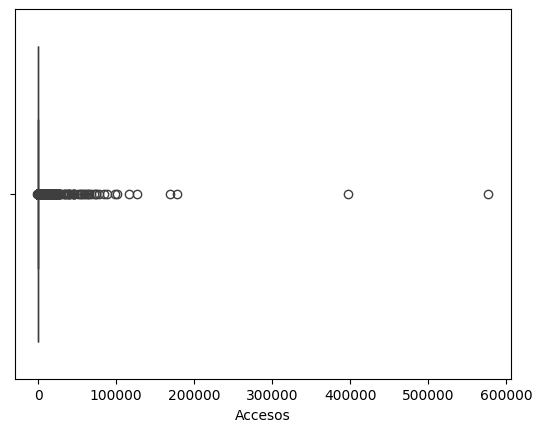

In [12]:
sns.boxplot(x=df_acc_vel_loc_sinrangos['Accesos'])


<Axes: xlabel='Velocidad (Mbps)'>

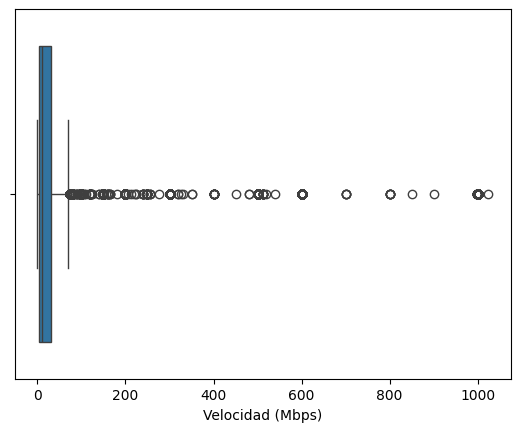

In [13]:
sns.boxplot(x=df_acc_vel_loc_sinrangos['Velocidad (Mbps)'])

#### Visualizaciones y analisis

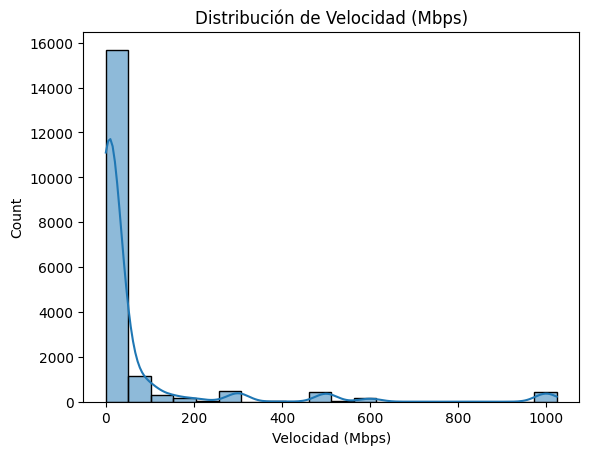

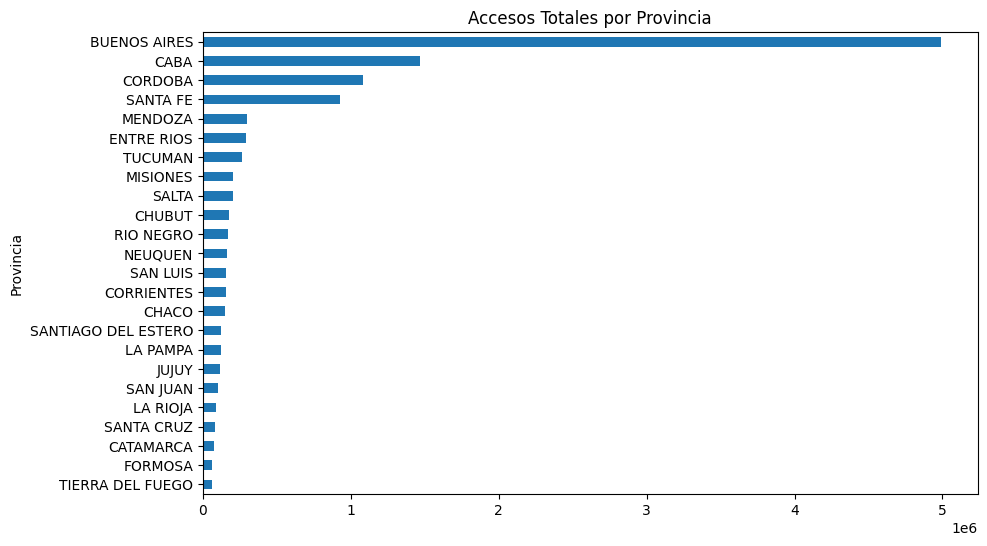

In [15]:
# Histograma de velocidades
sns.histplot(df_acc_vel_loc_sinrangos['Velocidad (Mbps)'], bins=20, kde=True)
plt.title('Distribución de Velocidad (Mbps)')
plt.show()

# Accesos por provincia
accesos_provincia = df_acc_vel_loc_sinrangos.groupby('Provincia')['Accesos'].sum().sort_values()
accesos_provincia.plot(kind='barh', figsize=(10, 6), title='Accesos Totales por Provincia')
plt.show()

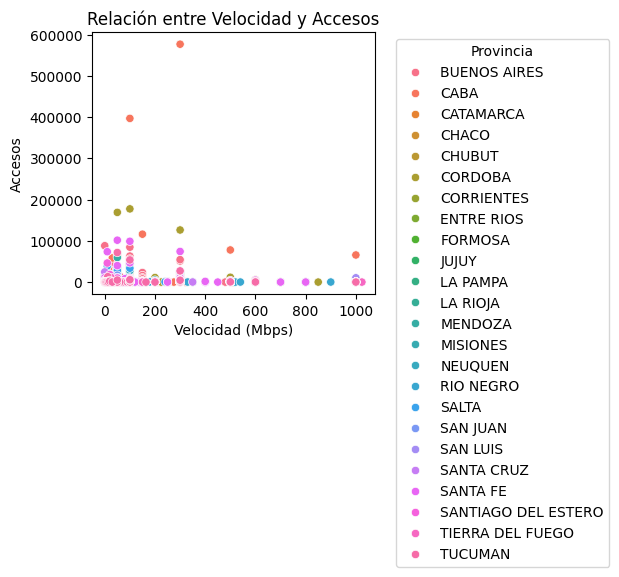

In [16]:
sns.scatterplot(data=df_acc_vel_loc_sinrangos, x='Velocidad (Mbps)', y='Accesos', hue='Provincia')
plt.title('Relación entre Velocidad y Accesos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Provincia')
plt.tight_layout() 
plt.show()

Observaciones sobre la distribución de accesos y velocidades

  La distribución de accesos a Internet refleja no solo la densidad demográfica, sino también las características geográficas del país. En las provincias con alta densidad poblacional, como Buenos Aires, se observa una mayor cantidad de accesos. Sin embargo, en regiones montañosas o alejadas, como la Patagonia o áreas del Noroeste argentino, la conectividad es significativamente menor.  

#### Identificación de patrones y oportunidades
**Accesos por localidad y provincia**

Calculamos la proporción de accesos por localidad respecto al total de accesos en su provincia. Esto ayudará a identificar qué localidades tienen menor participación relativa, lo que puede ser clave para el objetvo **Explorar oportunidades de crecimiento**

In [17]:
# Proporción de accesos por localidad dentro de cada provincia
df_acc_vel_loc_sinrangos['Accesos Relativos'] = df_acc_vel_loc_sinrangos.groupby('Provincia')['Accesos'].transform(lambda x: x / x.sum() * 100)

# Ver las localidades con menor proporción de accesos
df_sorted = df_acc_vel_loc_sinrangos.sort_values(by='Accesos Relativos', ascending=True)
print(df_sorted[['Provincia', 'Localidad', 'Accesos', 'Accesos Relativos']].head(10))


                 Provincia               Localidad  Accesos  Accesos Relativos
10597           CORRIENTES                   Otros   -830.0          -0.530436
7226                  CABA                   Otros   -590.0          -0.040158
12699             LA RIOJA                   Otros     -1.0          -0.001143
2708          BUENOS AIRES  Villa José León Suarez      0.0           0.000000
16222             SANTA FE           Bauer y Sigel      0.0           0.000000
18186  SANTIAGO DEL ESTERO                 Lavalle      0.0           0.000000
13902              NEUQUEN           Las Coloradas      0.0           0.000000
356           BUENOS AIRES                   Otros      0.0           0.000000
18047  SANTIAGO DEL ESTERO               San Pedro      0.0           0.000000
11481              FORMOSA         Mojón de Fierro      0.0           0.000000


#### Visualizamos cómo están distribuidos los accesos relativos entre las localidades de cada provincia para detectar posibles brechas.

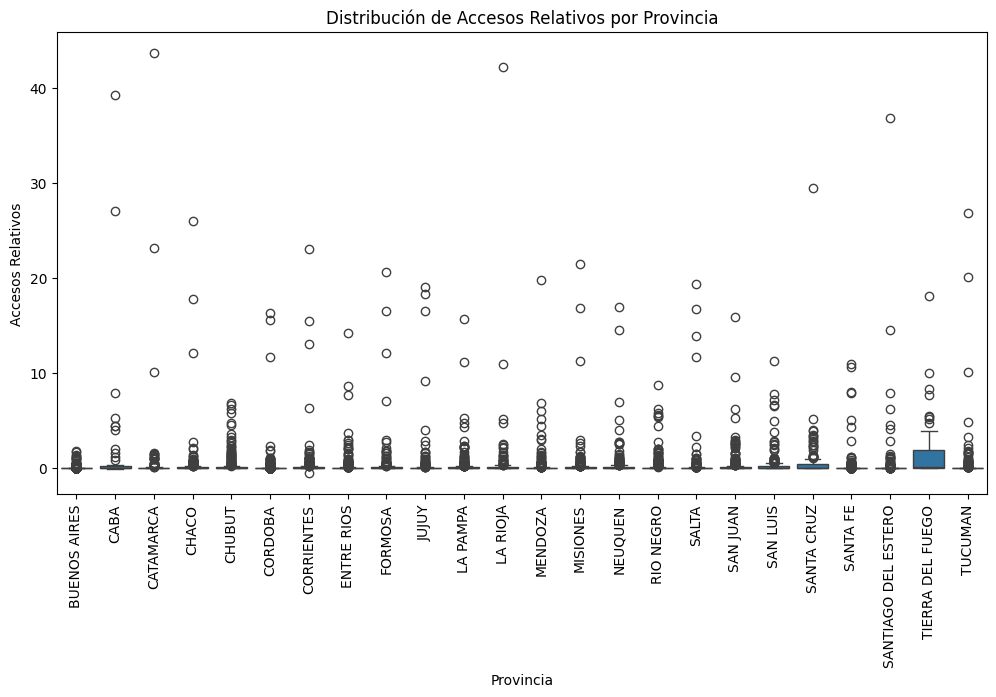

In [18]:
# Boxplot para ver accesos relativos por provincia
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_acc_vel_loc_sinrangos, x='Provincia', y='Accesos Relativos')
plt.xticks(rotation=90)
plt.title('Distribución de Accesos Relativos por Provincia')
plt.show()

Análisis de accesos relativos por localidad

- **Brechas de conectividad dentro de las provincias:**  
  Observamos que en muchas provincias, especialmente aquellas con alta dispersión geográfica como Salta y Jujuy, existen localidades con una proporción muy baja de accesos respecto al total provincial. Estas localidades podrían ser prioritarias para inversiones futuras.

dispersión por provincia: Velocidad vs. Accesos

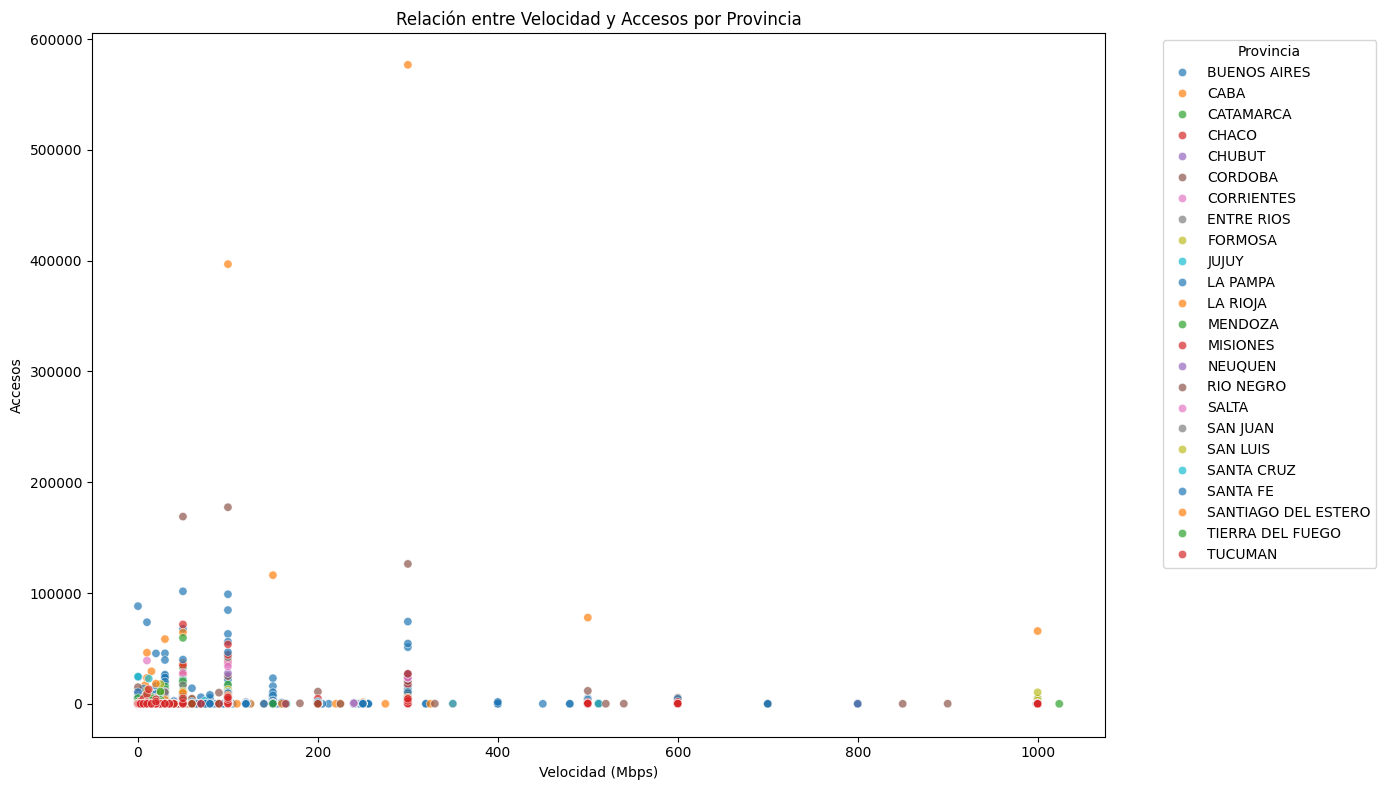

In [19]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_acc_vel_loc_sinrangos, x='Velocidad (Mbps)', y='Accesos', hue='Provincia', alpha=0.7, palette='tab10')
plt.title('Relación entre Velocidad y Accesos por Provincia')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Accesos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Provincia')
plt.tight_layout()
plt.show()


#### Relación entre Velocidad y Accesos por Provincia

- **Hallazgos clave:**  
  El gráfico revela una dispersión significativa en la relación entre velocidad y accesos. Algunas provincias con velocidades moderadas, como Buenos Aires, tienen un gran número de accesos, mientras que provincias con baja velocidad muestran menor conectividad.

---

#### Anaizamos el Dataframe **df_accesos_por_rangos**

In [20]:
print("Resumen del DataFrame: df_velocidad_sin _rangos")
df_velocidad_sin_rangos.info()  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_velocidad_sin_rangos.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_velocidad_sin_rangos.head())  # Primeras filas para una vista general

Resumen del DataFrame: df_velocidad_sin _rangos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        18884 non-null  int64  
 1   Trimestre  18884 non-null  int64  
 2   Provincia  18884 non-null  object 
 3   Velocidad  18874 non-null  float64
 4   Accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB

Estadísticas descriptivas:


,Año,Trimestre,Provincia,Velocidad,Accesos
count,18884.000000,18884.000000,18884,18874.000000,1.888400e+04
unique,NaN,NaN,48,NaN,NaN
top,NaN,NaN,Buenos Aires,NaN,NaN
freq,NaN,NaN,1650,NaN,NaN
mean,2021.017104,2.477653,NaN,96.171156,1.412328e+04
std,1.919740,1.126947,NaN,379.722905,6.856387e+04
min,2017.000000,1.000000,NaN,0.000000,0.000000e+00
25%,2019.000000,1.000000,NaN,4.000000,2.600000e+01
50%,2021.000000,2.000000,NaN,12.300000,6.725000e+02
75%,2023.000000,4.000000,NaN,50.100000,6.114000e+03



Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


Analisis de valores faltantes o nulos

In [21]:
# Conteo de valores nulos en cada columna
print("Valores nulos en cada columna de df_acc_vel_loc_sinrangos:")
display(df_velocidad_sin_rangos.isnull().sum())

Valores nulos en cada columna de df_acc_vel_loc_sinrangos:


Año           0
Trimestre     0
Provincia     0
Velocidad    10
Accesos       0
dtype: int64

Se encontraron 10 valores nulos en la columna velocidad. Al ser un numero poco relevante paa la cantidad de entradas se procede a elimnarlas

In [22]:
df_acc_vel_loc_sinrangos = df_acc_vel_loc_sinrangos.dropna()

Deteccion de duplicados

In [23]:
# Detección de registros duplicados
print("Número de registros duplicados en df_acc_vel_loc_sinrangos:", df_velocidad_sin_rangos.duplicated().sum())

Número de registros duplicados en df_acc_vel_loc_sinrangos: 0


In [24]:
# Detección de outliers utilizando el método IQR (Rango Inter Cuartilo)
for column in df_velocidad_sin_rangos.select_dtypes(include=['float64']).columns:
    Q1 = df_velocidad_sin_rangos [column].quantile(0.25)
    Q3 = df_velocidad_sin_rangos[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_velocidad_sin_rangos[column] < (Q1 - 1.5 * IQR)) | (df_velocidad_sin_rangos[column] > (Q3 + 1.5 * IQR))).sum()
    print(f"Columna {column}: {outliers} outliers detectados")

Columna Velocidad: 2800 outliers detectados


In [25]:
# Análisis por provincia
outlier_analysis = df_velocidad_sin_rangos.groupby('Provincia')['Velocidad'].describe()
print(outlier_analysis)


                      count        mean         std    min     25%   50%  \
Provincia                                                                  
BUENOS AIRES           80.0  125.093975  208.120650  0.000  10.750  40.5   
Buenos Aires         1646.0  163.408258  562.062300  0.256  10.000  32.0   
CABA                   53.0  156.613547  248.370413  0.000   8.000  50.0   
CATAMARCA              24.0  121.177833  246.994452  0.000   2.750  13.5   
CHACO                  29.0  114.362483  227.880938  0.000   4.000  12.0   
CHUBUT                 40.0  107.462950  243.505013  0.000   4.750  14.5   
CORDOBA                63.0  118.346317  227.288114  0.000   6.200  20.0   
CORRIENTES             29.0  114.560759  227.817084  0.000   3.500  15.0   
Capital Federal      1263.0  128.067649  286.571269  0.256   9.000  36.0   
Catamarca             493.0  105.466264  471.490795  0.256   2.200  10.1   
Chaco                 692.0  103.523175  603.631286  0.256   3.200  10.0   
Chubut      

Homogeneizar nombres de provincias

In [26]:
# Revisar nombres únicos de las provincias
print(df_velocidad_sin_rangos['Provincia'].unique())

['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN'
 'Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


In [27]:
# Normalizar los nombres de las provincias  
df_velocidad_sin_rangos['Provincia'] = df_velocidad_sin_rangos['Provincia'].str.strip().str.lower()  

# Diccionario de mapeo para homogeneizar  
mapeo_provincias = {  
    'buenos aires': 'BUENOS AIRES',  
    'buenos aires (gba)': 'BUENOS AIRES',  
    'capital federal': 'CABA',  
    'caba': 'CABA',  
    'catamarca':  'CATAMARCA',  
    'chaco': 'CHACO',  
    'chubut': 'CHUBUT',  
    'cordoba': 'CORDOBA',
    'córdoba' : 'CORDOBA',
    'corrientes': 'CORRIENTES',  
    'entre ríos': 'ENTRE RIOS',
    'etre rios' : 'ENTRE RIOS',
    'entre rios' : 'ENTRE RIOS',
    'formosa': 'FORMOSA',  
    'jujuy': 'JUJUY',   
    'la pampa': 'LA PAMPA',   
    'la rioja': 'LA RIOJA',  
    'mendoza': 'MENDOZA',  
    'misiones': 'MISIONES',  
    'neuquen': 'NEUQUEN',
    'neuquén': 'NEUQUEN',  
    'rio negro': 'RIO NEGRO',
    'río negro' : 'RIO NEGRO',
    'salta': 'SALTA',  
    'san juan': 'SAN JUAN',  
    'san luis': 'SAN LUIS',  
    'santa cruz': 'SANTA CRUZ',  
    'santa fe': 'SANTA FE',  
    'santiago del estero': 'SANTIAGO DEL ESTERO',   
    'tierra del fuego': 'TIERRA DEL FUEGO',  
    'tucuman': 'TUCUMAN',
    'tucumán': 'TUCUMAN'
}  

# Aplicar el mapeo  
df_velocidad_sin_rangos['Provincia'] = df_velocidad_sin_rangos['Provincia'].replace(mapeo_provincias)  

Verificar la corrección

In [28]:
# Revisar nombres únicos de las provincias
print(df_velocidad_sin_rangos['Provincia'].unique())

['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']


In [29]:
outlier_analysis = df_velocidad_sin_rangos.groupby('Provincia')['Velocidad'].describe()
print(outlier_analysis)

                      count        mean         std  min     25%   50%    75%  \
Provincia                                                                       
BUENOS AIRES         1726.0  161.632393  550.737263  0.0  10.000  32.0  100.1   
CABA                 1316.0  129.217294  285.103623  0.0   9.000  36.0  126.0   
CATAMARCA             517.0  106.195621  463.350935  0.0   2.200  10.1   31.0   
CHACO                 721.0  103.959153  593.058781  0.0   3.200  10.0   31.0   
CHUBUT                685.0   39.750218  113.839888  0.0   3.200   9.0   25.1   
CORDOBA              1289.0  105.248294  235.478610  0.0   6.000  17.0   71.0   
CORRIENTES            644.0   66.277009  171.624870  0.0   3.425  12.3   31.0   
ENTRE RIOS            760.0  106.936225  333.933242  0.0   4.000  12.3   46.0   
FORMOSA               596.0   49.587730  145.239023  0.0   3.200  10.1   25.1   
JUJUY                 647.0  128.456587  627.203125  0.0   4.250  12.3   50.1   
LA PAMPA              810.0 

Visualizacion de outliers

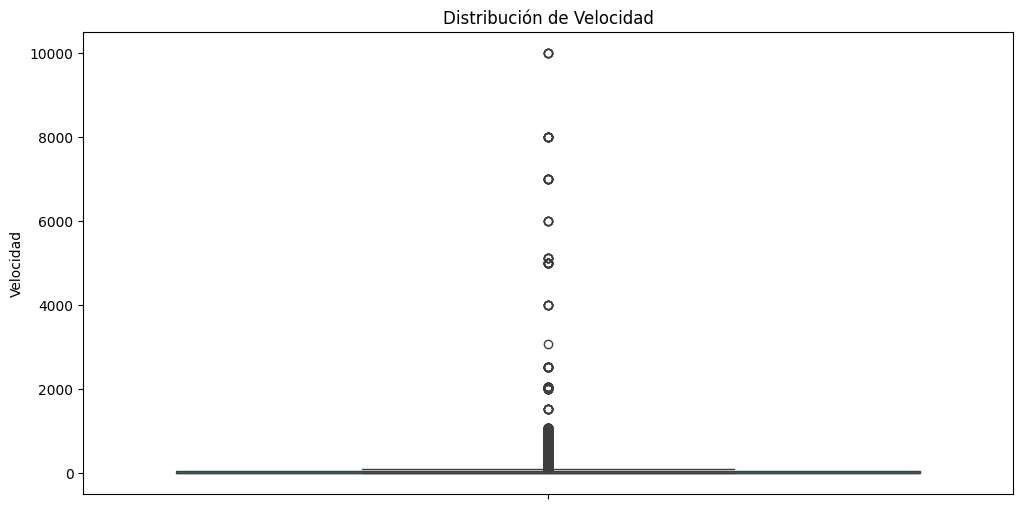

In [30]:
# Visualización de outliers en velocidad
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_velocidad_sin_rangos, y='Velocidad')
plt.title('Distribución de Velocidad')
plt.ylabel('Velocidad')
plt.show()


#### Visualizaciones y analisis

Distribución de velocidades por provincia:

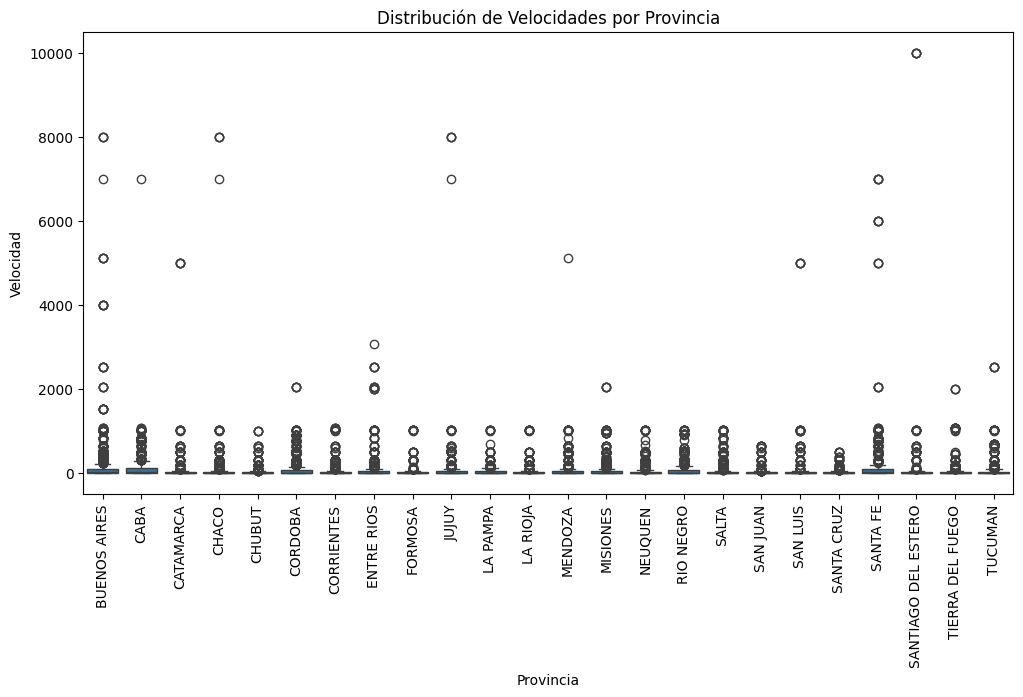

In [31]:
# Distribución de velocidades
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_velocidad_sin_rangos, x='Provincia', y='Velocidad')
plt.title('Distribución de Velocidades por Provincia')
plt.xticks(rotation=90)
plt.ylabel('Velocidad')
plt.xlabel('Provincia')
plt.show()


Relación entre velocidad y accesos:

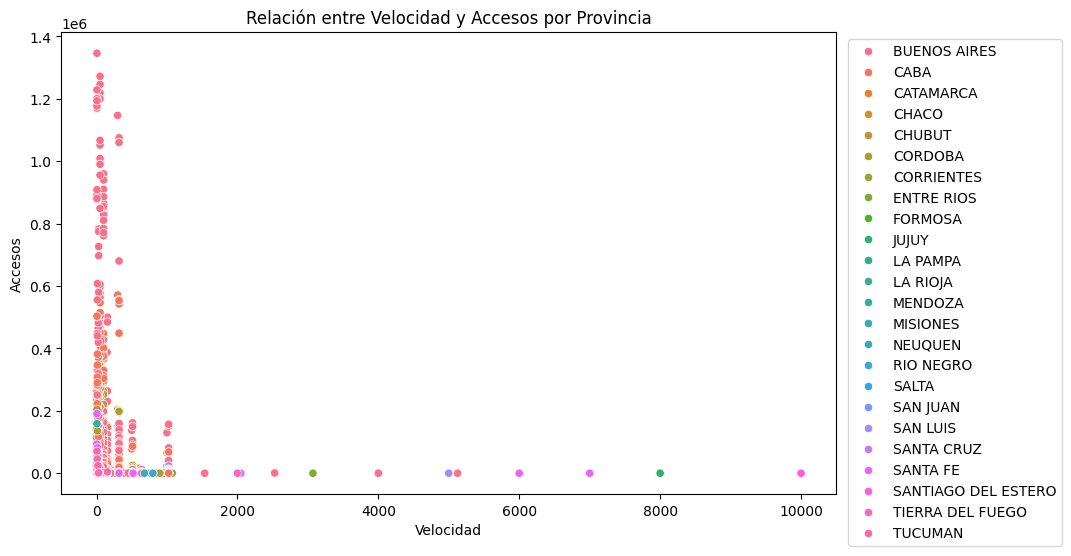

In [32]:
# Scatterplot de velocidad vs. accesos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_velocidad_sin_rangos, x='Velocidad', y='Accesos', hue='Provincia')
plt.title('Relación entre Velocidad y Accesos por Provincia')
plt.xlabel('Velocidad')
plt.ylabel('Accesos')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


Exploración de Velocidades y Accesos por Provincia

El boxplot muestra cómo las velocidades promedio varían significativamente entre provincias, reflejando desigualdades en infraestructura y cobertura. Por otro lado, el scatterplot indica que, en general, las provincias con mayores velocidades tienden a tener más accesos, pero algunas provincias rompen esta tendencia, lo que sugiere que hay áreas con alta conectividad pero baja calidad del servicio.

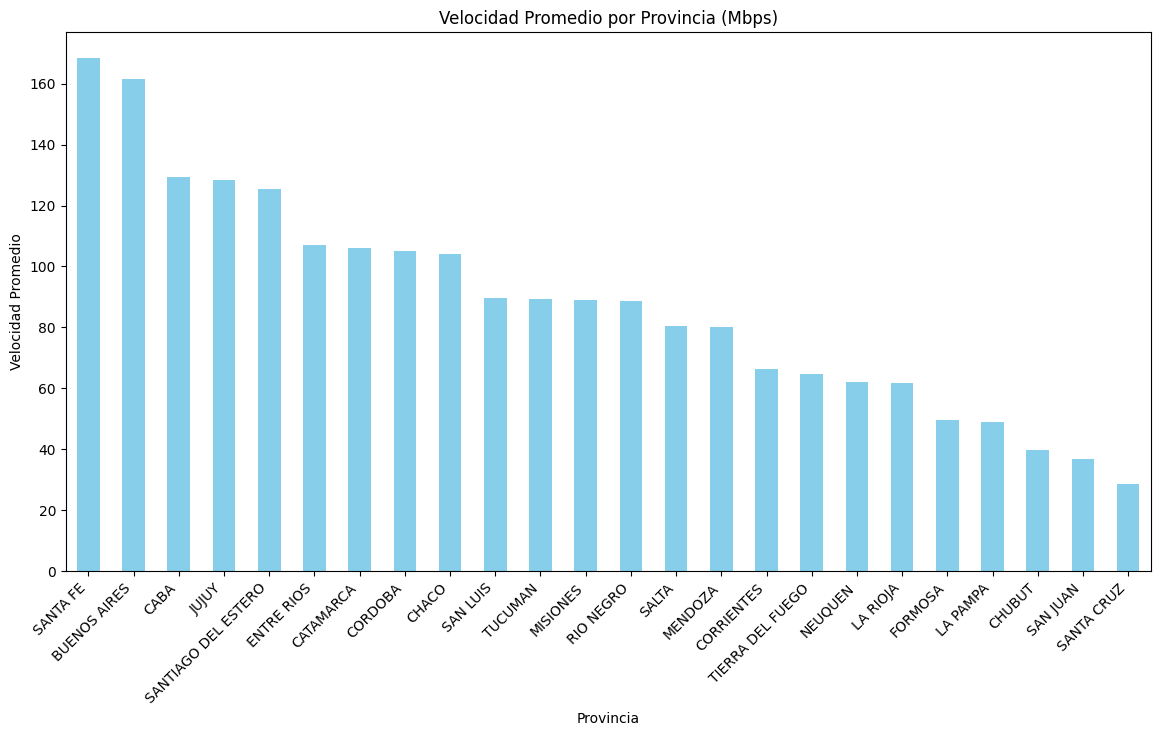

In [33]:
# Velocidad promedio por provincia
provincia_velocidad = df_velocidad_sin_rangos.groupby('Provincia')['Velocidad'].mean().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(14, 7))
provincia_velocidad.plot(kind='bar', color='skyblue')
plt.title('Velocidad Promedio por Provincia (Mbps)')
plt.ylabel('Velocidad Promedio')
plt.xlabel('Provincia')
plt.xticks(rotation=45, ha='right')
plt.show()


La **distribución de las velocidades** muestra que la mayoría de los accesos están concentrados en un rango específico, con algunas provincias destacándose con velocidades más altas.

Existen diferencias significativas entre provincias en términos de **velocidad promedio**. Esto puede ser un reflejo de la infraestructura disponible, la densidad poblacional, y las inversiones en tecnología. Porque ya hemos visto que dentro de las provincias tambien hay diferencias significativas.

**Relación entre Velocidad y Accesos**
Las provincias con velocidades más altas tienden a tener mayor cantidad de accesos. Esto sugiere que mejorar la velocidad puede ser una estrategia efectiva para incrementar la adopción de servicios.

---

#### Analizamos **df_velocidad_porciento_prov**

In [34]:
print("Resumen del DataFrame: df_velocidad_porciento_prov")
df_velocidad_porciento_prov.info()  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_velocidad_porciento_prov.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_velocidad_porciento_prov.head())  # Primeras filas para una vista general

Resumen del DataFrame: df_velocidad_porciento_prov
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB

Estadísticas descriptivas:


,Año,Trimestre,Provincia,Mbps (Media de bajada)
count,1008.000000,1008.000000,1008,1008.000000
unique,NaN,NaN,24,NaN
top,NaN,NaN,Buenos Aires,NaN
freq,NaN,NaN,42,NaN
mean,2018.761905,2.452381,NaN,24.720245
std,3.039439,1.117574,NaN,33.660764
min,2014.000000,1.000000,NaN,2.573729
25%,2016.000000,1.000000,NaN,4.866698
50%,2019.000000,2.000000,NaN,10.089315
75%,2021.000000,3.000000,NaN,29.875292



Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


In [35]:
# Conteo de valores nulos en cada columna
print("Valores nulos en cada columna de df_acc_vel_loc_sinrangos:")
display(df_velocidad_porciento_prov.isnull().sum())

Valores nulos en cada columna de df_acc_vel_loc_sinrangos:


Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [36]:
# Detección de registros duplicados
print("Número de registros duplicados en df_acc_vel_loc_sinrangos:", df_velocidad_porciento_prov.duplicated().sum())

Número de registros duplicados en df_acc_vel_loc_sinrangos: 0


In [37]:
# Detección de outliers utilizando el método IQR (Rango Inter Cuartilo)
for column in df_velocidad_porciento_prov.select_dtypes(include=['float64']).columns:
    Q1 = df_velocidad_porciento_prov [column].quantile(0.25)
    Q3 = df_velocidad_porciento_prov[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_velocidad_porciento_prov[column] < (Q1 - 1.5 * IQR)) | (df_velocidad_porciento_prov[column] > (Q3 + 1.5 * IQR))).sum()
    print(f"Columna {column}: {outliers} outliers detectados")

Columna Mbps (Media de bajada): 111 outliers detectados


#### Visualizaciones y analisis

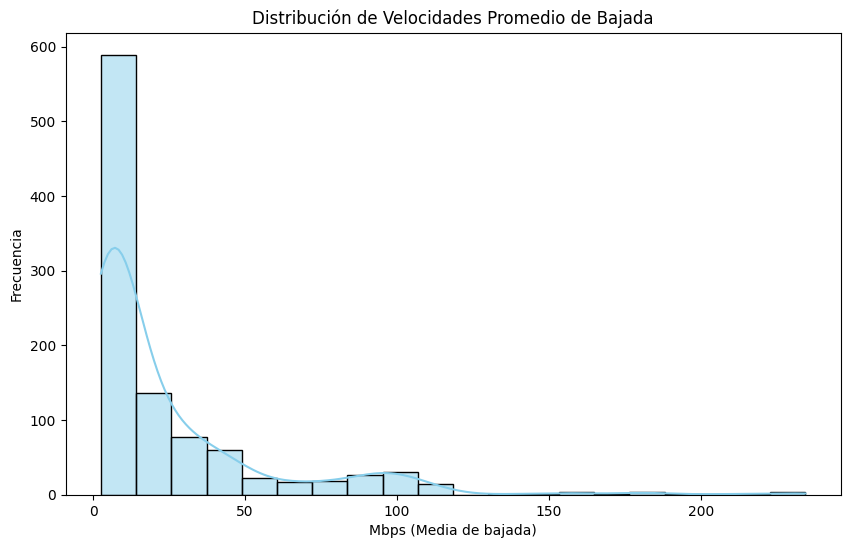

In [38]:
# Histograma de velocidades promedio
plt.figure(figsize=(10, 6))
sns.histplot(df_velocidad_porciento_prov['Mbps (Media de bajada)'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Velocidades Promedio de Bajada')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')
plt.show()

**Distribución General**: La velocidad promedio de bajada en Argentina muestra una distribución amplia, con ciertas provincias rezagadas en su desarrollo tecnológico.

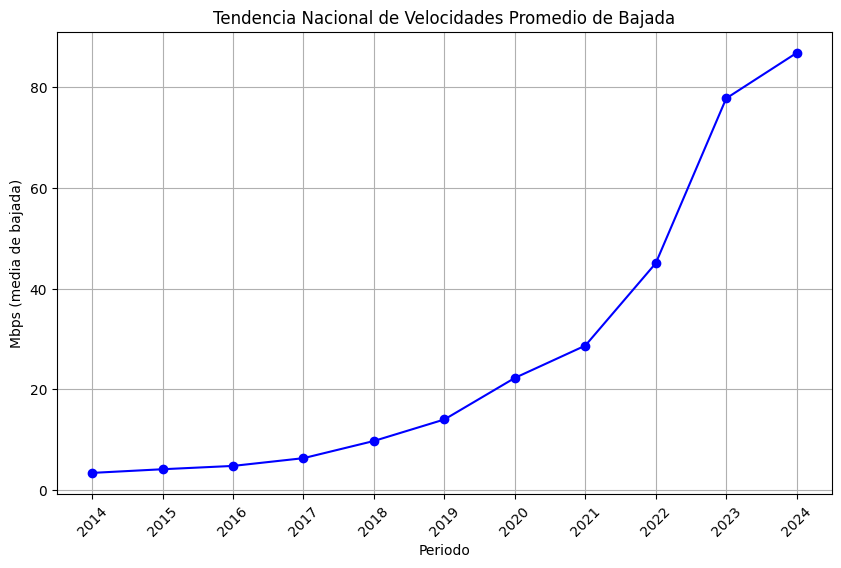

In [39]:
# Promedio nacional por trimestre
promedio_nacional = df_velocidad_porciento_prov.groupby(['Año'])['Mbps (Media de bajada)'].mean().reset_index()
promedio_nacional['Periodo'] = promedio_nacional['Año'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(promedio_nacional['Periodo'], promedio_nacional['Mbps (Media de bajada)'], marker='o', color='blue')
plt.title('Tendencia Nacional de Velocidades Promedio de Bajada')
plt.xlabel('Periodo')
plt.ylabel('Mbps (media de bajada)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Tendencias Temporales**: Se observa una mejora constante en la velocidad nacional, posiblemente impulsada por inversiones en infraestructura.

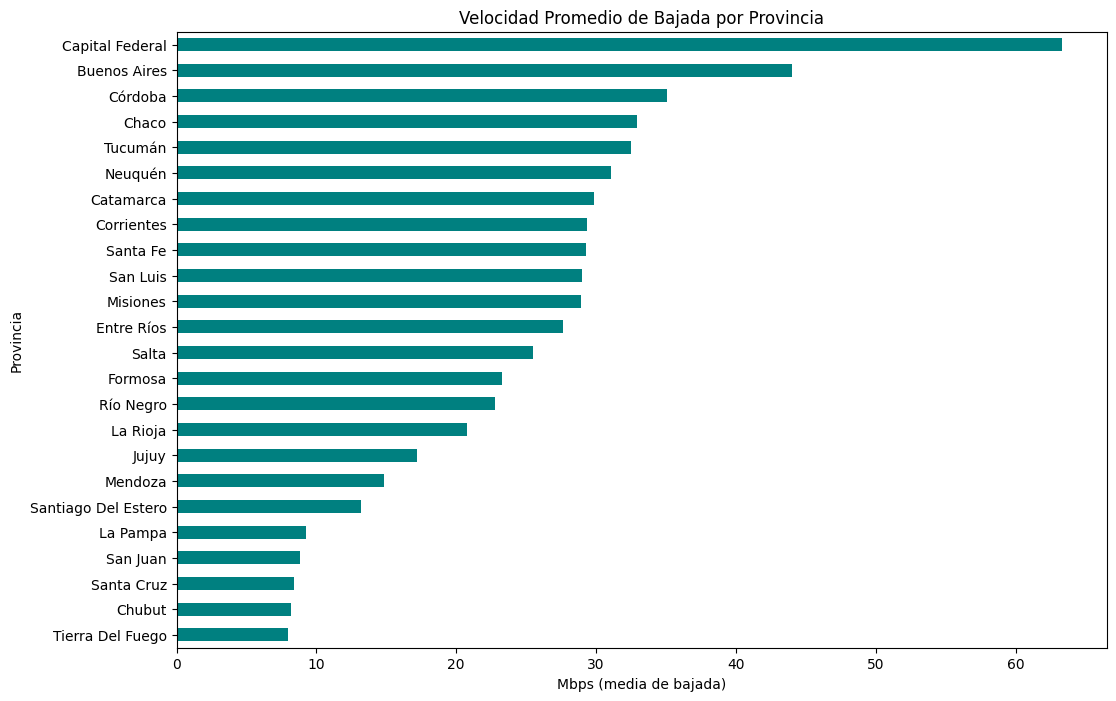

In [40]:
# Promedio por provincia
promedio_provincia = df_velocidad_porciento_prov.groupby('Provincia')['Mbps (Media de bajada)'].mean().sort_values()

plt.figure(figsize=(12, 8))
promedio_provincia.plot(kind='barh', color='teal')
plt.title('Velocidad Promedio de Bajada por Provincia')
plt.xlabel('Mbps (media de bajada)')
plt.ylabel('Provincia')
plt.show()


**Comparación Regional**: Las provincias más alejadas o con menor población tienden a presentar velocidades menores, destacándose como áreas potenciales de mejora para la empresa.

---

**KPI: Velocidad Promedio de Bajada por Localidad sobre Meta Nacional**

**Justificación**:
Este KPI permite medir si las velocidades promedio de internet, (en las localidades donde presta servicio la empresa) cumplen con un estándar establecido por esta o, de existir, con las regulaciones nacionales o locales. 

Refleja la calidad del servicio ofrecido, identificando localidades donde el desempeño técnico no es competitivo.

**Formula** df_acc_vel_loc_sinrangos['Velocidad (Mbps)'] / meta_nacional) * 100  

Ej: si la velocidad promedio de una localidad es de 20 Mbps y la meta nacional es de 30 KPI = (20/30) x 100 = 66.7 %

**Beneficios del KPI**
Permite evaluar el desempeño del servicio en términos de velocidad, un componente clave de la calidad.

In [41]:
# Meta Nacional
meta_nacional = 30  # En Mbps

# Cálculo del KPI
df_acc_vel_loc_sinrangos['KPI (%)'] = (
    df_acc_vel_loc_sinrangos['Velocidad (Mbps)'] / meta_nacional
) * 100

# Clasificación de cumplimiento
def clasificar_kpi(valor):
    if valor >= 90:
        return 'Cumple (>90%)'
    elif 70 <= valor < 90:
        return 'Parcial (70-90%)'
    else:
        return 'No cumple (<70%)'

df_acc_vel_loc_sinrangos['Clasificación'] = df_acc_vel_loc_sinrangos['KPI (%)'].apply(clasificar_kpi)



---

### Objetvo: **Oportunidades de crecimiento** 

Para este objetivo, utilizaremos los siguientes Dataframes:

**Accesos_tecnologia_localidad**: Detalla los accesos por tecnologías en cada localidad.

**Penetración-Población, Penetración-Hogares, y Penetración-Totales**: Proporcionan la tasa de penetración de internet respecto a la población y los hogares.

**Totales Accesos Por Tecnología**: Resumen nacional por tecnología.

In [42]:
# Cargamos los dataframes
df_accesos_tecnologia_localidad= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Accesos_tecnologia_localidad.csv")
df_penetracion_hogares= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Penetracion-hogares.csv")
df_penetracion_poblacion= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Penetración-poblacion.csv")
df_penetracion_totales= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Penetracion-totales.csv")
df_totales_acc_por_tecnologia= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Totales Accesos Por Tecnología.csv")

#### Comenzamos por el dataframe **df_accesos_tecnologia_localidad**

In [43]:
print("Resumen del DataFrame: df_accesos_tecnologia_localidad")
display(df_accesos_tecnologia_localidad.info())  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_accesos_tecnologia_localidad.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_accesos_tecnologia_localidad.head())  # Primeras filas para una vista general

Resumen del DataFrame: df_accesos_tecnologia_localidad
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


None


Estadísticas descriptivas:


,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
count,7753,7753,7753,7753,7753,7.747000e+03
unique,24,435,2793,10,2671,NaN
top,BUENOS AIRES,San Justo,OTROS,WIRELESS,6427010,NaN
freq,2313,136,52,2223,89,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.491688e+03
std,NaN,NaN,NaN,NaN,NaN,1.520174e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,5.900000e+01
75%,NaN,NaN,NaN,NaN,NaN,4.005000e+02



Primeras filas del DataFrame:


,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [44]:
# Conteo de valores nulos en cada columna
print("Valores nulos en cada columna de df_accesos_tecnologia_localidad:")
display(df_accesos_tecnologia_localidad.isnull().sum())

Valores nulos en cada columna de df_accesos_tecnologia_localidad:


Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       6
dtype: int64

In [45]:
# eliminamos valores nulos
df_accesos_tecnologia_localidad = df_accesos_tecnologia_localidad.dropna()

In [46]:
# Detección de registros duplicados
print("Número de registros duplicados en df_accesos_tecnologia_localidad:",df_accesos_tecnologia_localidad.duplicated().sum())

Número de registros duplicados en df_accesos_tecnologia_localidad: 0


In [47]:
# Detección de outliers utilizando el método IQR (Rango Inter Cuartilo)
for column in df_accesos_tecnologia_localidad.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_accesos_tecnologia_localidad [column].quantile(0.25)
    Q3 = df_accesos_tecnologia_localidad [column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_accesos_tecnologia_localidad[column] < (Q1 - 1.5 * IQR)) | (df_accesos_tecnologia_localidad[column] > (Q3 + 1.5 * IQR))).sum()
    print(f"Columna {column}: {outliers} outliers detectados")


Columna Accesos: 1196 outliers detectados


los outliers corresponden a ciudades densamente pobladas 

In [48]:
# Revisar nombres únicos de las provincias
print(df_accesos_tecnologia_localidad['Provincia'].unique())
print(df_accesos_tecnologia_localidad['Tecnologia'].unique())


['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']
['ADSL' 'CABLEMODEM' 'FIBRA OPTICA' 'SATELITAL' 'WIRELESS' 'Otros'
 'DIAL UP' 'OTROS' 'WIMAX' 'Cablemodem']


In [49]:
# Normalizar los nombres de las tecnologias  
df_accesos_tecnologia_localidad['Tecnologia'] = df_accesos_tecnologia_localidad['Tecnologia'].str.strip().str.lower()  

# Diccionario de mapeo para homogeneizar  
mapeo_tecnologia = {  
    'Otros': 'OTROS',  
    'Cablemodem': 'CABLEMODEM'
}  

# Aplicar el mapeo  
df_accesos_tecnologia_localidad['Tecnologia'] = df_accesos_tecnologia_localidad['Tecnologia'].replace(mapeo_tecnologia)  

In [50]:
print(df_accesos_tecnologia_localidad['Tecnologia'].unique())

['adsl' 'cablemodem' 'fibra optica' 'satelital' 'wireless' 'otros'
 'dial up' 'wimax']


#### Visualizacion y analisis

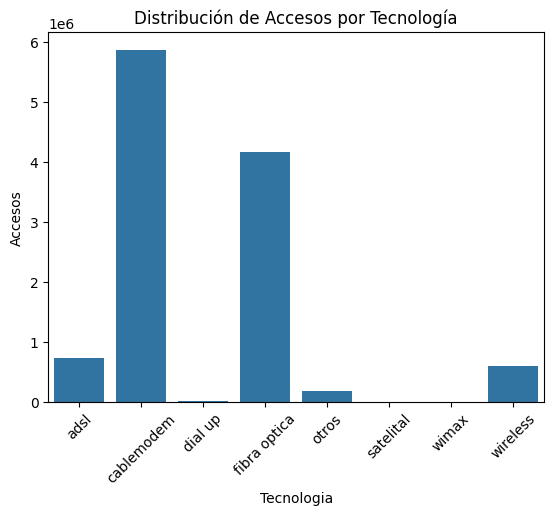

In [51]:
distribucion_tecnologia = df_accesos_tecnologia_localidad.groupby('Tecnologia')['Accesos'].sum().reset_index()
sns.barplot(data=distribucion_tecnologia, x='Tecnologia', y='Accesos')
plt.title('Distribución de Accesos por Tecnología')
plt.xticks(rotation=45)
plt.show()

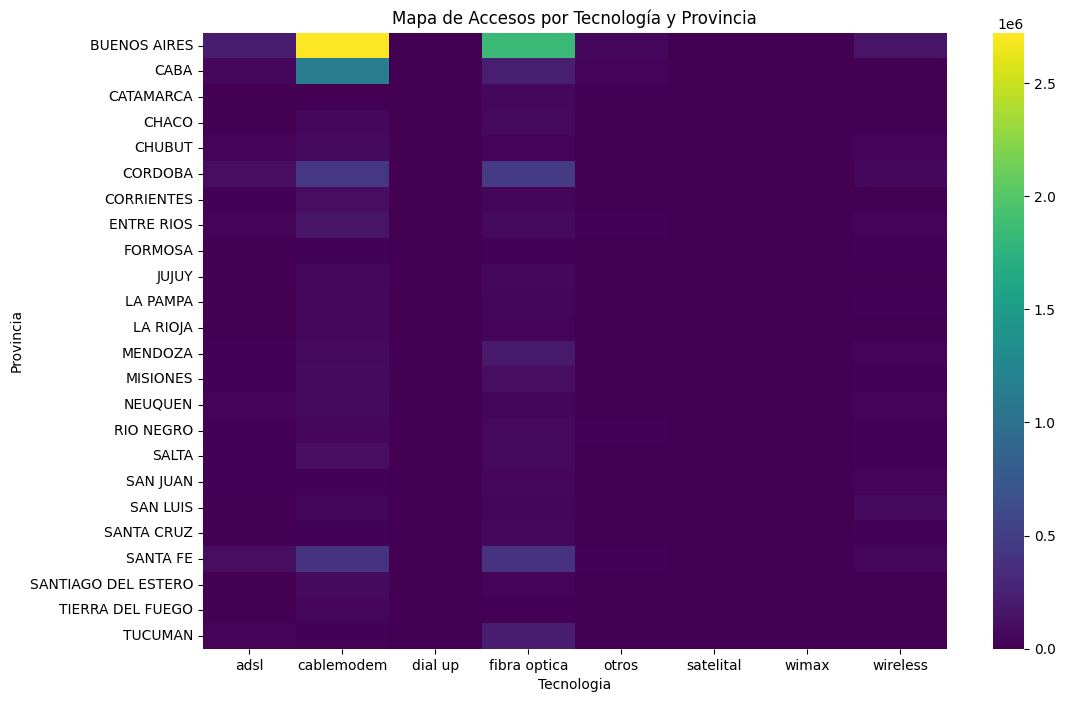

In [52]:
mapa_calor = df_accesos_tecnologia_localidad.pivot_table(
    index='Provincia', columns='Tecnologia', values='Accesos', aggfunc='sum', fill_value=0
)
plt.figure(figsize=(12, 8))
sns.heatmap(mapa_calor, cmap='viridis', annot=False)
plt.title('Mapa de Accesos por Tecnología y Provincia')
plt.show()

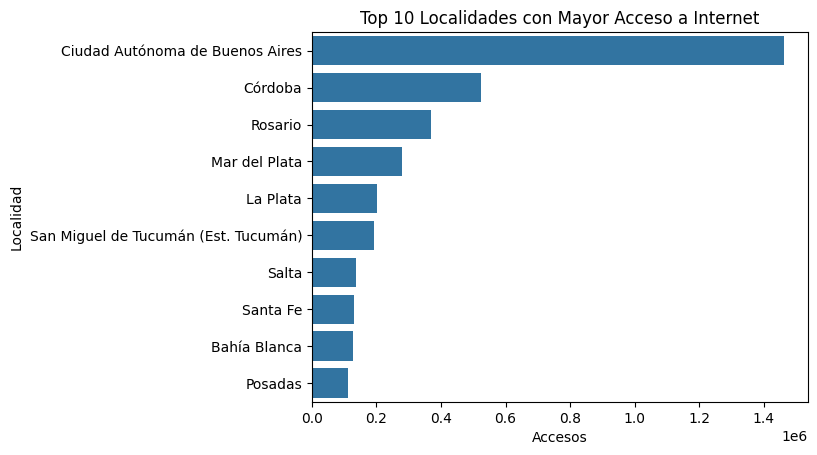

In [53]:
top10_localidades = df_accesos_tecnologia_localidad.groupby('Localidad')['Accesos'].sum().nlargest(10).reset_index()
sns.barplot(data=top10_localidades, x='Accesos', y='Localidad')
plt.title('Top 10 Localidades con Mayor Acceso a Internet')
plt.show()

Con base en este análisis, es claro que hay una concentración de accesos en áreas densamente pobladas y con tecnologías modernas como Fibra Óptica y Cablemódem. 

#### Analizamos **df_penetracion_poblacion** , **df_penetracion_hogares** y **df_penetracion_totales**

In [54]:
print("Resumen del DataFrame: df_penetracion_poblacion")
df_penetracion_poblacion.info()  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_penetracion_poblacion.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_penetracion_poblacion.head())  # Primeras filas para una vista general

Resumen del DataFrame: df_penetracion_poblacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB

Estadísticas descriptivas:


,Año,Trimestre,Provincia,Accesos por cada 100 hab
count,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,24,NaN
top,NaN,NaN,Buenos Aires,NaN
freq,NaN,NaN,42,NaN
mean,2018.800000,2.464000,NaN,15.727248
std,3.021445,1.114426,NaN,9.240063
min,2014.000000,1.000000,NaN,2.723000
25%,2016.000000,1.000000,NaN,9.018188
50%,2019.000000,2.000000,NaN,13.674812
75%,2021.000000,3.000000,NaN,20.323973



Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [55]:
# Conteo de valores nulos en cada columna
print("Valores nulos en cada columna de df_penetracion_poblacion:")
display(df_penetracion_poblacion.isnull().sum())


Valores nulos en cada columna de df_penetracion_poblacion:


Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [56]:
# Detección de registros duplicados
print("Número de registros duplicados en df_penetracion_poblacion:", df_penetracion_poblacion.duplicated().sum())


Número de registros duplicados en df_penetracion_poblacion: 0


In [57]:
# Detección de outliers utilizando el método IQR (Rango Inter Cuartilo)
for column in df_penetracion_poblacion.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_penetracion_poblacion [column].quantile(0.25)
    Q3 = df_penetracion_poblacion [column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_penetracion_poblacion[column] < (Q1 - 1.5 * IQR)) | (df_penetracion_poblacion[column] > (Q3 + 1.5 * IQR))).sum()
    print(f"Columna {column}: {outliers} outliers detectados")

Columna Año: 0 outliers detectados
Columna Trimestre: 0 outliers detectados
Columna Accesos por cada 100 hab: 42 outliers detectados


Nuevamente los outliers corresponden a zonas densamente pobladas y se mantendran como estan con el fin de respetar la realidad del dataframe

In [58]:
print("Resumen del DataFrame: df_penetracion_hogares")
df_penetracion_hogares.info()  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_penetracion_hogares.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_penetracion_hogares.head())  # Primeras filas para una vista general

Resumen del DataFrame: df_penetracion_hogares
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB

Estadísticas descriptivas:


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
count,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,24,NaN
top,NaN,NaN,Buenos Aires,NaN
freq,NaN,NaN,42,NaN
mean,2018.800000,2.464000,NaN,52.794973
std,3.021445,1.114426,NaN,24.135063
min,2014.000000,1.000000,NaN,9.513970
25%,2016.000000,1.000000,NaN,33.957657
50%,2019.000000,2.000000,NaN,50.133004
75%,2021.000000,3.000000,NaN,67.010861



Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [59]:
print("Valores nulos en cada columna de df_penetracion_hogares:")
display(df_penetracion_hogares.isnull().sum())

Valores nulos en cada columna de df_penetracion_hogares:


Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [60]:
# Detección de outliers utilizando el método IQR (Rango Inter Cuartilo)
for column in df_penetracion_hogares.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_penetracion_hogares [column].quantile(0.25)
    Q3 = df_penetracion_hogares [column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_penetracion_hogares[column] < (Q1 - 1.5 * IQR)) | (df_penetracion_hogares[column] > (Q3 + 1.5 * IQR))).sum()
    print(f"Columna {column}: {outliers} outliers detectados")


Columna Año: 0 outliers detectados
Columna Trimestre: 0 outliers detectados
Columna Accesos por cada 100 hogares: 14 outliers detectados


Los outliers son pocos y nuevamente pertenecientes a zonas densamente pobladas o zonas con desarrollo tecnologico

In [61]:
print("Resumen del DataFrame: df_penetracion_totales")
df_penetracion_totales.info()  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_penetracion_totales.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_penetracion_totales.head())  # Primeras filas para una vista general


Resumen del DataFrame: df_penetracion_totales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB

Estadísticas descriptivas:


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
count,42.000000,42.000000,42.000000,42.000000,42
unique,NaN,NaN,NaN,NaN,42
top,NaN,NaN,NaN,NaN,Abr-Jun 2024
freq,NaN,NaN,NaN,NaN,1
mean,2018.761905,2.452381,63.201813,19.574600,NaN
std,3.074756,1.130560,9.950321,3.268665,NaN
min,2014.000000,1.000000,49.545821,15.050104,NaN
25%,2016.000000,1.250000,53.784644,16.519507,NaN
50%,2019.000000,2.000000,62.667764,19.395586,NaN
75%,2021.000000,3.000000,72.527011,22.603664,NaN



Primeras filas del DataFrame:


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


#### Visualizacion y analisis

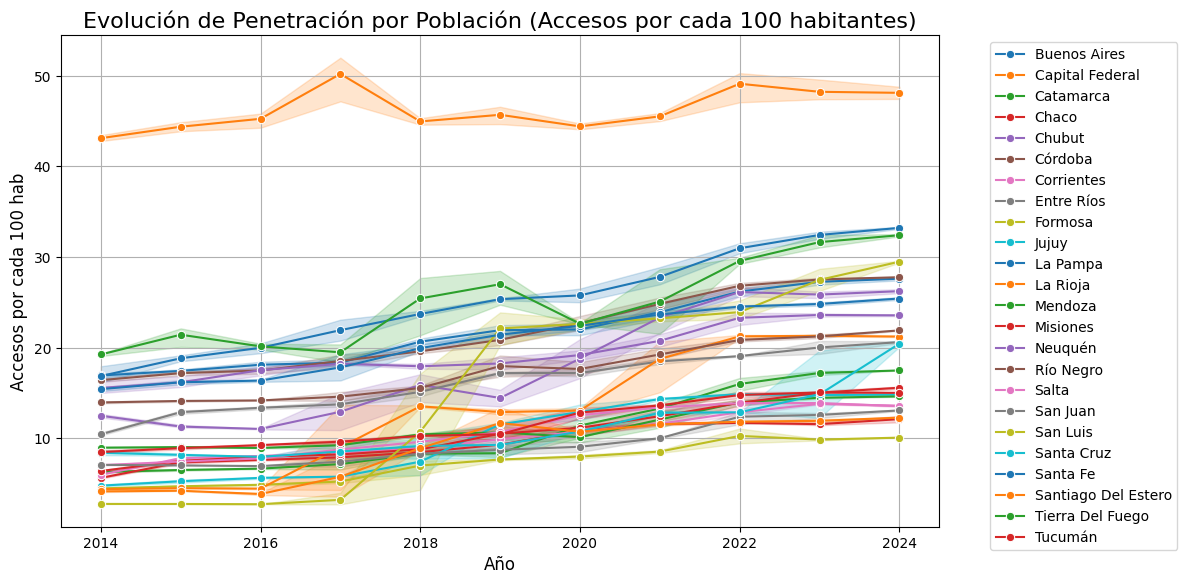

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_penetracion_poblacion, 
            x='Año', 
            y='Accesos por cada 100 hab', 
            hue='Provincia', 
            marker='o', 
            palette='tab10')
plt.title("Evolución de Penetración por Población (Accesos por cada 100 habitantes)", fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos por cada 100 hab', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True)
plt.tight_layout()
plt.show()

C:\Users\juanv\AppData\Local\Temp\ipykernel_1272\2055177441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_penetracion_poblacion,


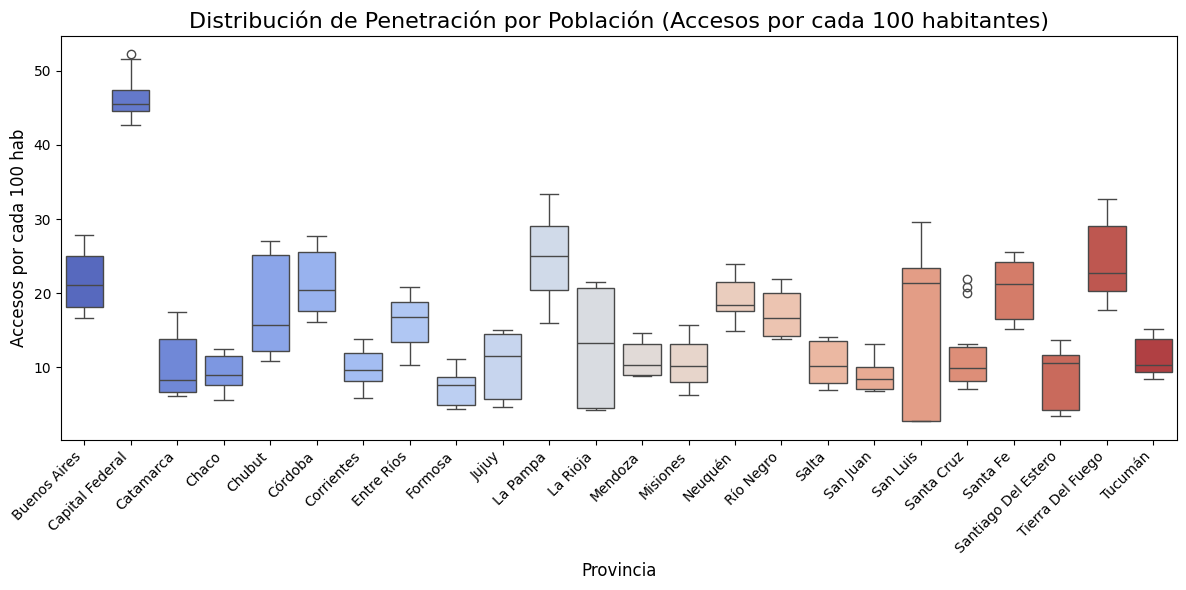

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_penetracion_poblacion, 
            x='Provincia', 
            y='Accesos por cada 100 hab', 
            palette='coolwarm')
plt.title("Distribución de Penetración por Población (Accesos por cada 100 habitantes)", fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Accesos por cada 100 hab', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

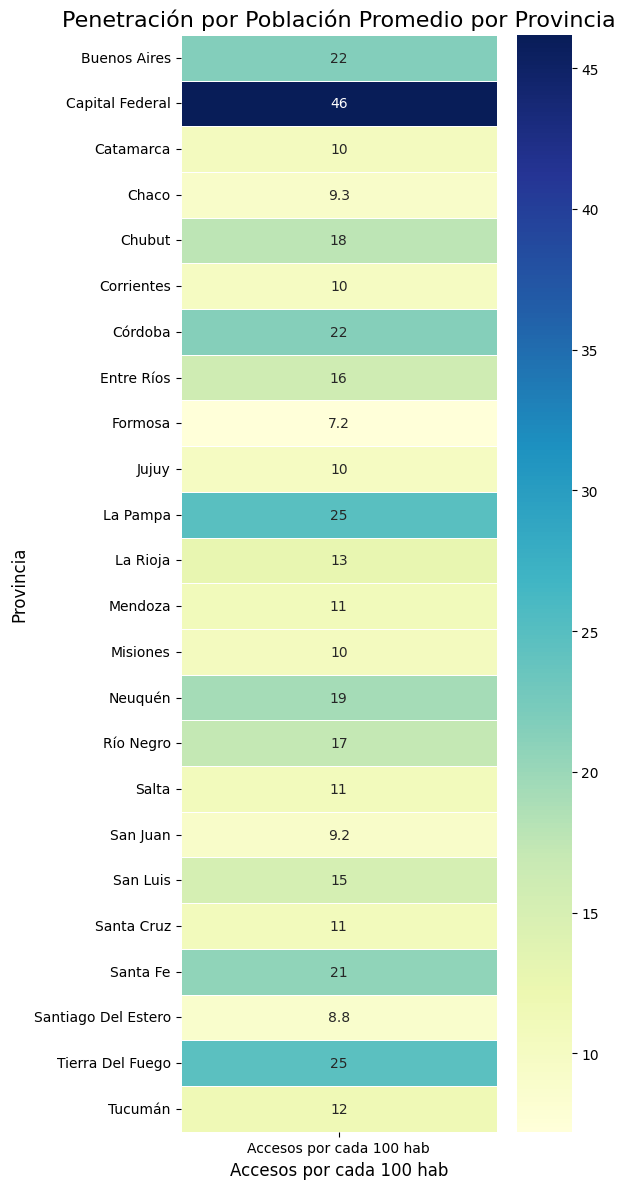

In [64]:
promedio_poblacion = df_penetracion_poblacion.groupby('Provincia')['Accesos por cada 100 hab'].mean().reset_index()
promedio_poblacion = promedio_poblacion.pivot_table(index='Provincia', values='Accesos por cada 100 hab')

plt.figure(figsize=(6, 12))
sns.heatmap(promedio_poblacion, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title("Penetración por Población Promedio por Provincia", fontsize=16)
plt.ylabel('Provincia', fontsize=12)
plt.xlabel('Accesos por cada 100 hab', fontsize=12)
plt.tight_layout()
plt.show()

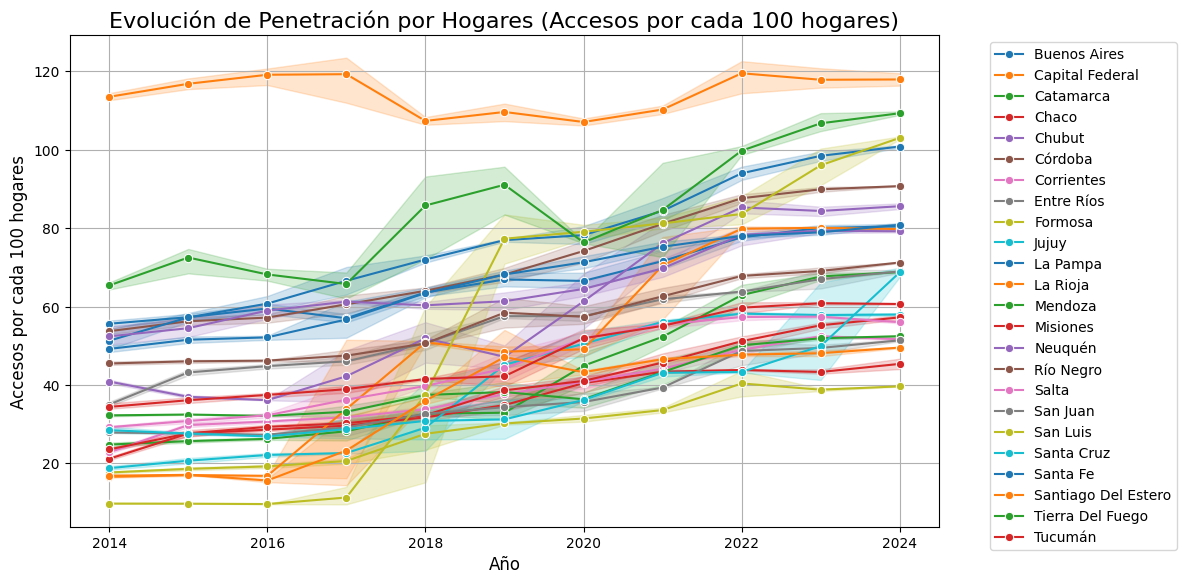

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_penetracion_hogares, 
             x='Año', 
             y='Accesos por cada 100 hogares', 
             hue='Provincia', 
             marker='o', 
             palette='tab10')
plt.title("Evolución de Penetración por Hogares (Accesos por cada 100 hogares)", fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos por cada 100 hogares', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True)
plt.tight_layout()
plt.show()

C:\Users\juanv\AppData\Local\Temp\ipykernel_1272\2594552189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_penetracion_hogares,


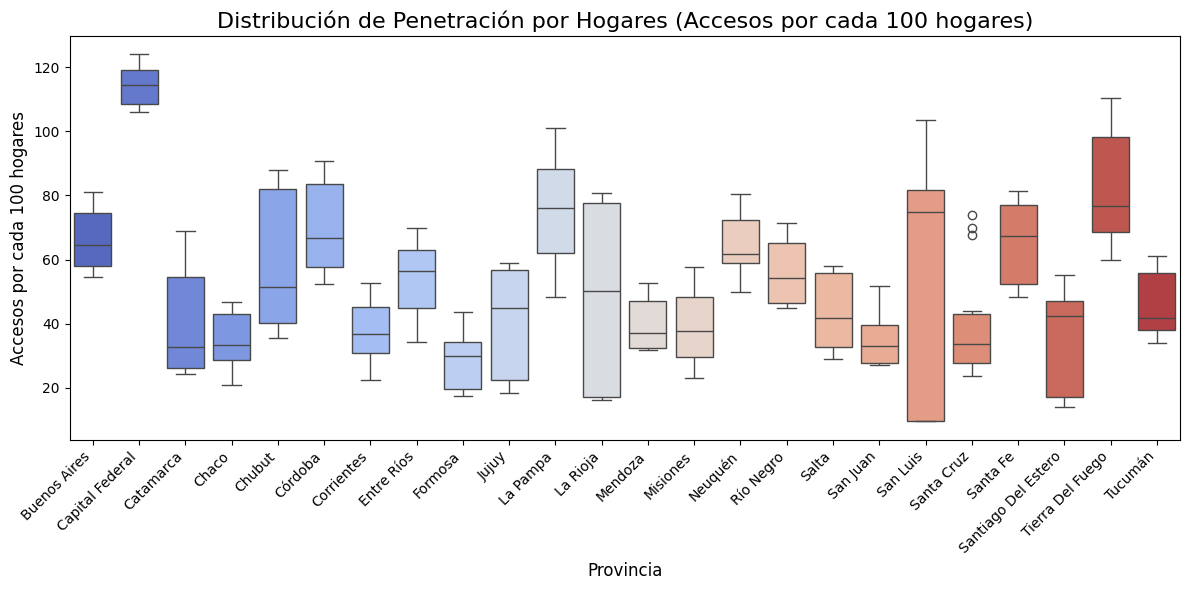

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_penetracion_hogares, 
            x='Provincia', 
            y='Accesos por cada 100 hogares', 
            palette='coolwarm')
plt.title("Distribución de Penetración por Hogares (Accesos por cada 100 hogares)", fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Accesos por cada 100 hogares', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

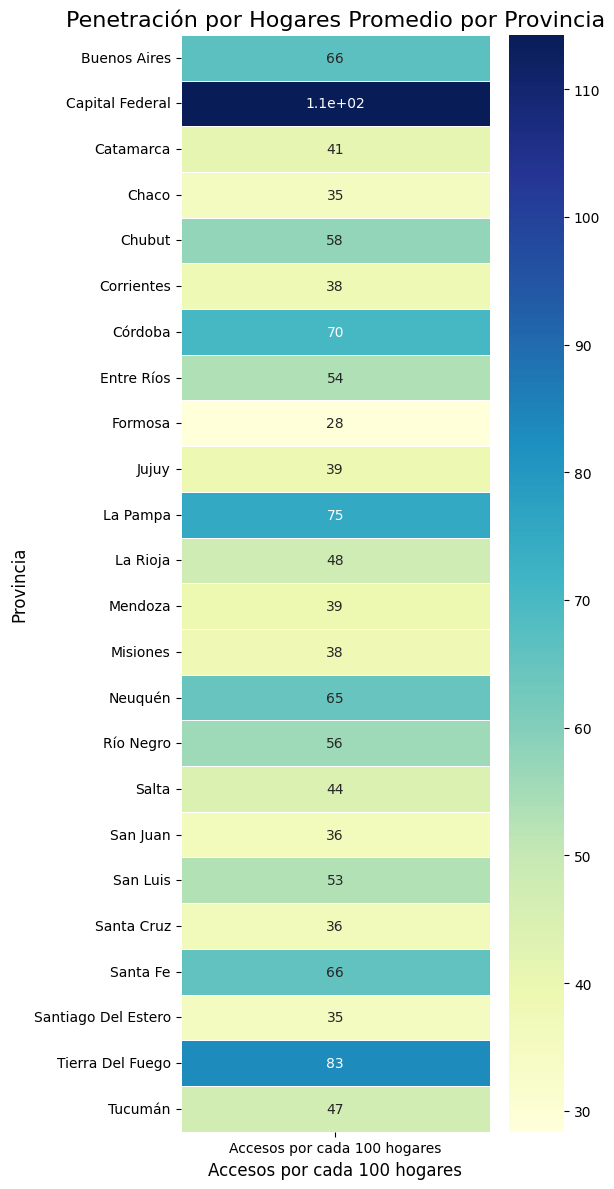

In [67]:
promedio_hogares = df_penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].mean().reset_index()
promedio_hogares = promedio_hogares.pivot_table(index='Provincia', values='Accesos por cada 100 hogares')

plt.figure(figsize=(6, 12))
sns.heatmap(promedio_hogares, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title("Penetración por Hogares Promedio por Provincia", fontsize=16)
plt.ylabel('Provincia', fontsize=12)
plt.xlabel('Accesos por cada 100 hogares', fontsize=12)
plt.tight_layout()
plt.show()

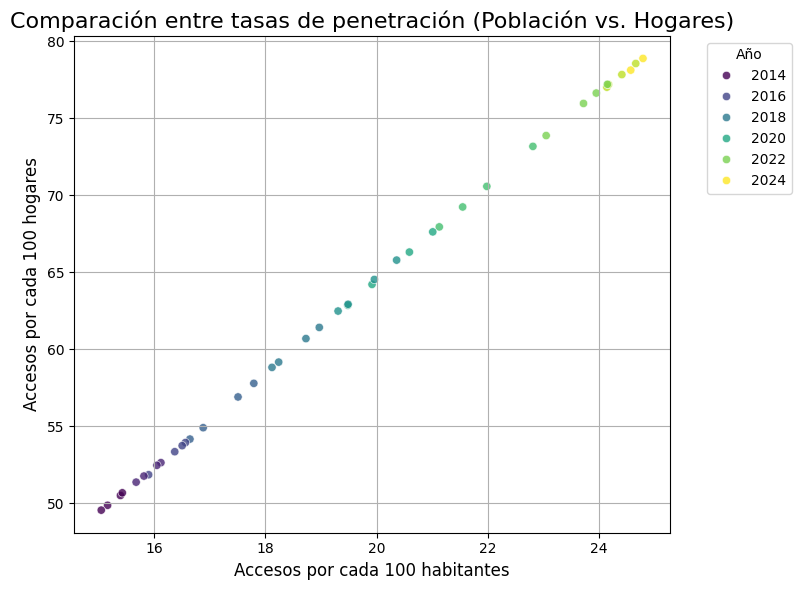

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_penetracion_totales, 
                x='Accesos por cada 100 hab', 
                y='Accesos por cada 100 hogares', 
                hue='Año', 
                palette='viridis', 
                alpha=0.8)
plt.title('Comparación entre tasas de penetración (Población vs. Hogares)', fontsize=16)
plt.xlabel('Accesos por cada 100 habitantes', fontsize=12)
plt.ylabel('Accesos por cada 100 hogares', fontsize=12)
plt.grid(visible=True)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Conclusiones**

**Concentración tecnológica**:
La mayor parte de los accesos está concentrada en tecnologías de Cablemódem y Fibra Óptica, lo que resalta el avance hacia infraestructuras modernas.
Provincias como Buenos Aires lideran en penetración, lo que refuerza su papel central en la conectividad nacional.

**Disparidades regionales**:
Las zonas densamente pobladas muestran mayores tasas de penetración, mientras que las zonas alejadas o montañosas presentan un rezago considerable, especialmente en tecnologías avanzadas como la Fibra Óptica.

El análisis por provincias refleja oportunidades claras en áreas con baja penetración relativa, como NOA y NEA.


**KPI: Crecimiento de la Penetración Tecnológica**

Mide el cambio porcentual en la tasa de penetración de internet, ya sea por población o por hogares, en un período dado (trimestre o año).

Fórmula:
Tasa de Crecimiento = {(Accesos Trimestre Actual - Accesos Trimestre Anterior)/ Accesos Trimestre Anterior} × 100
​
Este KPI permite priorizar inversiones en áreas con tasas de crecimiento prometedoras.


---

### Objetivo: **Personalización de servicios**

Los DataFrames que exploraremos son:

Accesos Por Tecnología: Detalle por provincia y tecnología.

Accesos por Rangos: Segmentación de accesos por velocidad.

Dial-BAf y Totales Dial-BAf: Accesos históricos y por tecnologías.

In [70]:
# Cargamos los dataframes
df_acc_por_tecnologia= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Accesos Por Tecnología.csv")
df_acc_por_rangos= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Accesos por rangos.csv")
df_dial_baf= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Dial-Baf.csv")
df_totales_dial_baf= pd.read_csv ("C:/Users/juanv/Documents/Proyecto Individual 2/Internet/csv_files/Totales Dial-BAf.csv")

 ### Exploramos **df_acc_por_tecnologia**

In [71]:
print("Resumen del DataFrame: df_acc_por_tecnologia")
df_acc_por_tecnologia.info()
print("\nEstadísticas descriptivas:")
display(df_acc_por_tecnologia.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_acc_por_tecnologia.head())  # Primeras filas para una vista general


Resumen del DataFrame: df_acc_por_tecnologia
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB

Estadísticas descriptivas:


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,1008,1008,1007,1.007000e+03,1.007000e+03,1.007000e+03,1007.000000,1007.000000,1.007000e+03
unique,13,8,24,NaN,NaN,NaN,NaN,NaN,NaN
top,2023,2,Mendoza,NaN,NaN,NaN,NaN,NaN,NaN
freq,96,240,42,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.129309e+05,1.821583e+05,4.855699e+04,12542.229394,6497.041708,3.626854e+05
std,NaN,NaN,NaN,2.362922e+05,4.460058e+05,1.758694e+05,20909.412762,11239.855091,7.773137e+05
min,NaN,NaN,NaN,2.230000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,NaN,NaN,NaN,1.978950e+04,1.102050e+04,3.540000e+02,813.000000,334.500000,6.241150e+04
50%,NaN,NaN,NaN,4.396700e+04,4.075000e+04,3.015000e+03,5224.000000,1920.000000,1.139150e+05
75%,NaN,NaN,NaN,8.722000e+04,7.678350e+04,2.925700e+04,14367.500000,7548.000000,1.956520e+05



Primeras filas del DataFrame:


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [72]:

# Conteo de valores nulos en cada columna
print("Valores nulos en cada columna de df_acc_vel_loc_sinrangos:")
display(df_acc_por_tecnologia.isnull().sum())


Valores nulos en cada columna de df_acc_vel_loc_sinrangos:


Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [73]:
df_acc_por_tecnologia = df_acc_por_tecnologia.dropna()

In [74]:
# Detección de registros duplicados
print("Número de registros duplicados en df_acc_vel_loc_sinrangos:", df_acc_por_tecnologia.duplicated().sum())


Número de registros duplicados en df_acc_vel_loc_sinrangos: 0


### Visualizaciones y analisis

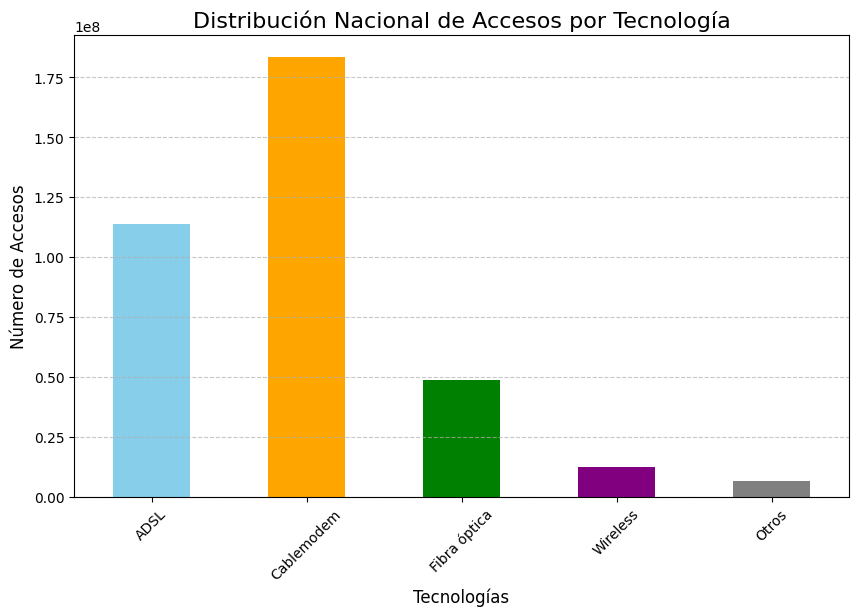

In [75]:
# Sumar los accesos por tecnología a nivel nacional
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
totales_por_tecnologia = df_acc_por_tecnologia[tecnologias].sum()

# Gráfico de barras
plt.figure(figsize=(10, 6))
totales_por_tecnologia.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple', 'gray'])
plt.title('Distribución Nacional de Accesos por Tecnología', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=12)
plt.xlabel('Tecnologías', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\juanv\AppData\Local\Temp\ipykernel_1272\867853901.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xticks(tendencia_temporal.index, tendencia_temporal[['Año', 'Trimestre']].apply(lambda x: f"{x[0]}-T{x[1]}", axis=1), rotation=45)


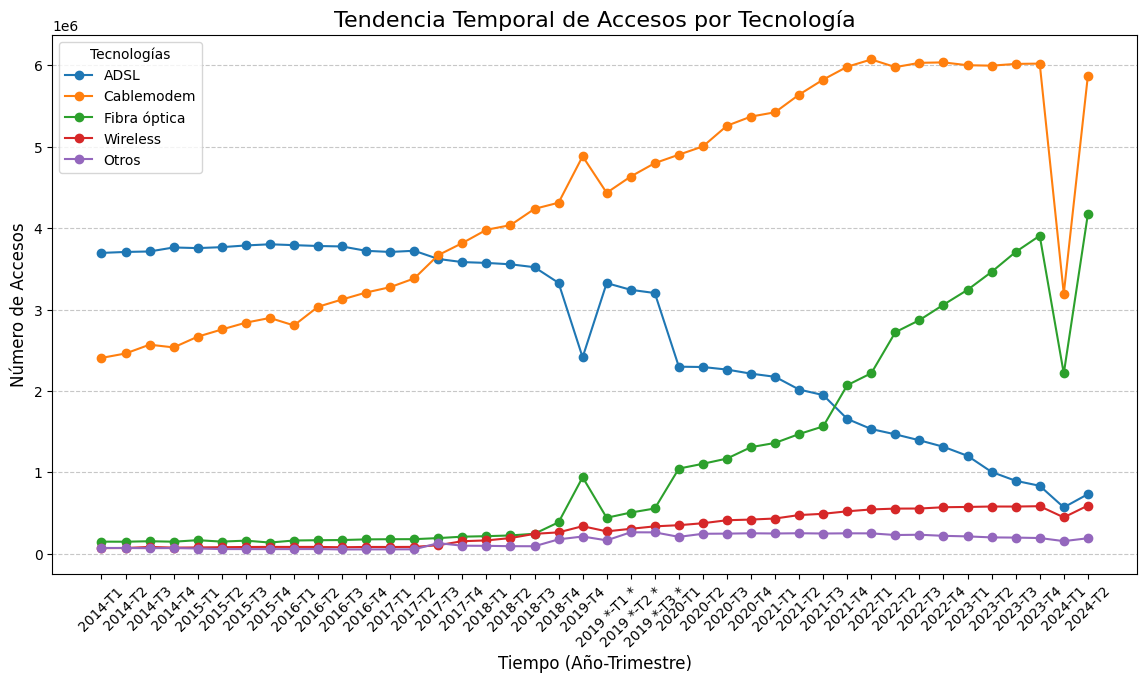

In [76]:
# Agrupar por Año y Trimestre y sumar accesos para cada tecnología
tendencia_temporal = df_acc_por_tecnologia.groupby(['Año', 'Trimestre'])[tecnologias].sum().reset_index()

# Gráfico de líneas
plt.figure(figsize=(14, 7))
for tecnologia in tecnologias:
    plt.plot(
        tendencia_temporal.index,
        tendencia_temporal[tecnologia],
        label=tecnologia,
        marker='o'
    )
plt.title('Tendencia Temporal de Accesos por Tecnología', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=12)
plt.xlabel('Tiempo (Año-Trimestre)', fontsize=12)
plt.legend(title='Tecnologías')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(tendencia_temporal.index, tendencia_temporal[['Año', 'Trimestre']].apply(lambda x: f"{x[0]}-T{x[1]}", axis=1), rotation=45)
plt.show()

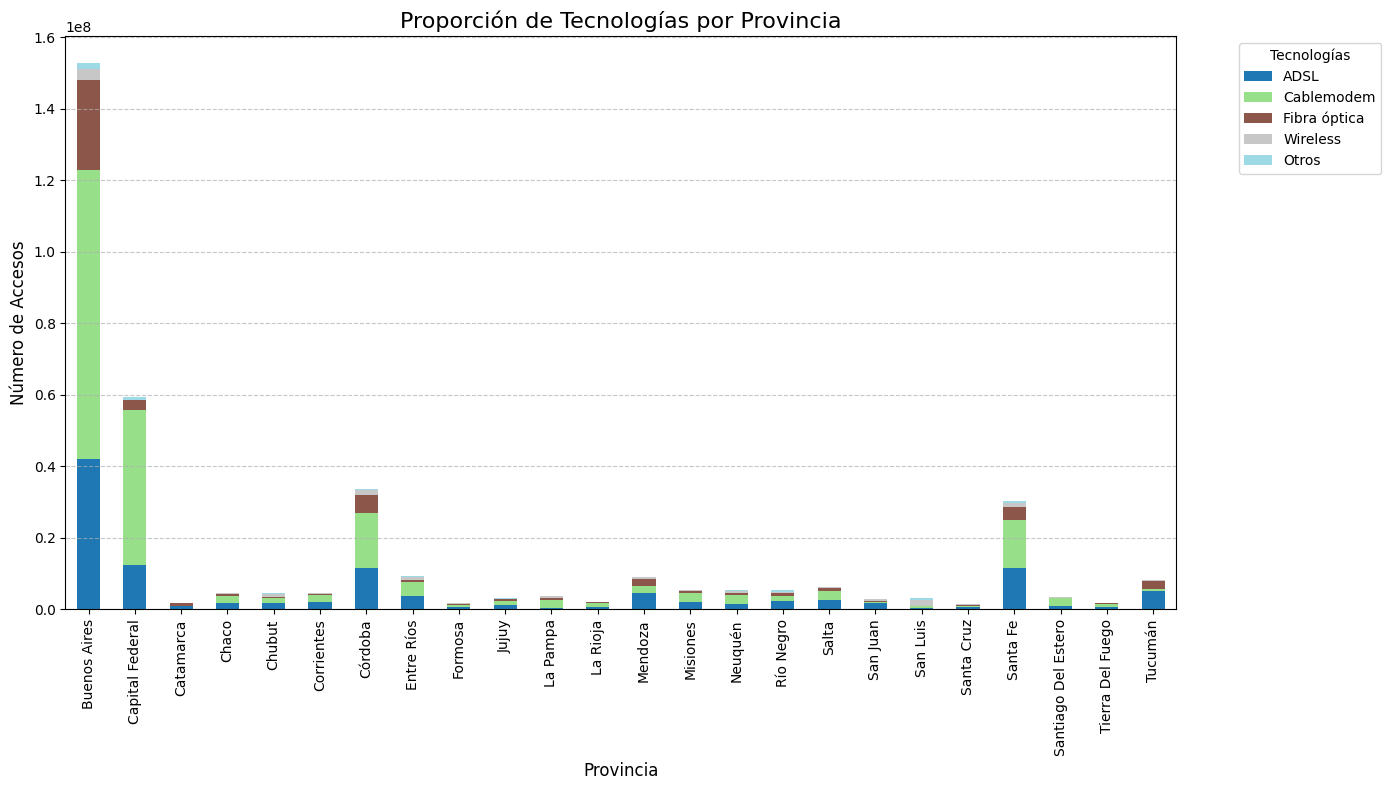

In [77]:
# Agrupar por Provincia y sumar accesos para cada tecnología
proporcion_por_provincia = df_acc_por_tecnologia.groupby('Provincia')[tecnologias].sum()

# Gráfico de barras apilado
proporcion_por_provincia.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'
)
plt.title('Proporción de Tecnologías por Provincia', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=12)
plt.xlabel('Provincia', fontsize=12)
plt.legend(title='Tecnologías', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Exploramos **df_acc_por_rangos**

In [78]:
print("Resumen del DataFrame: df_acc_por_rangos")
df_acc_por_rangos.info()  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_acc_por_rangos.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_acc_por_rangos.head())  # Primeras filas para una vista general


Resumen del DataFrame: df_acc_por_rangos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB

Estadísticas descriptivas:


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,994.000000,1.000000e+03
unique,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2018.824000,2.464000,NaN,1953.317000,8864.257000,1.327725e+05,38408.510000,37138.329000,20091.330000,1.222098e+05,6510.467807,3.679094e+05
std,3.058493,1.114426,NaN,12676.575806,20312.520997,3.222569e+05,64156.365883,88290.744464,69299.281156,4.657500e+05,15344.465875,7.899348e+05
min,2014.000000,1.000000,NaN,6.000000,0.000000,1.124000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,NaN,43.250000,389.750000,2.381250e+04,3876.750000,2706.750000,43.750000,1.500000e+01,0.000000,6.234225e+04
50%,2019.000000,2.000000,NaN,107.000000,2061.000000,4.213250e+04,13932.000000,10503.000000,1658.000000,4.253500e+03,346.500000,1.136205e+05
75%,2021.000000,3.000000,NaN,466.250000,6851.500000,8.371025e+04,42593.500000,26463.750000,10109.250000,4.339925e+04,6830.750000,1.969198e+05



Primeras filas del DataFrame:


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


In [79]:

# Conteo de valores nulos en cada columna
print("Valores nulos en cada columna de df_acc_por_rangos:")
display(df_acc_por_rangos.isnull().sum())


Valores nulos en cada columna de df_acc_por_rangos:


Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [80]:
# Detección de registros duplicados
print("Número de registros duplicados en df_acc_vel_loc_sinrangos:", df_acc_por_rangos.duplicated().sum())


Número de registros duplicados en df_acc_vel_loc_sinrangos: 0


### Visualizaciones y analisis

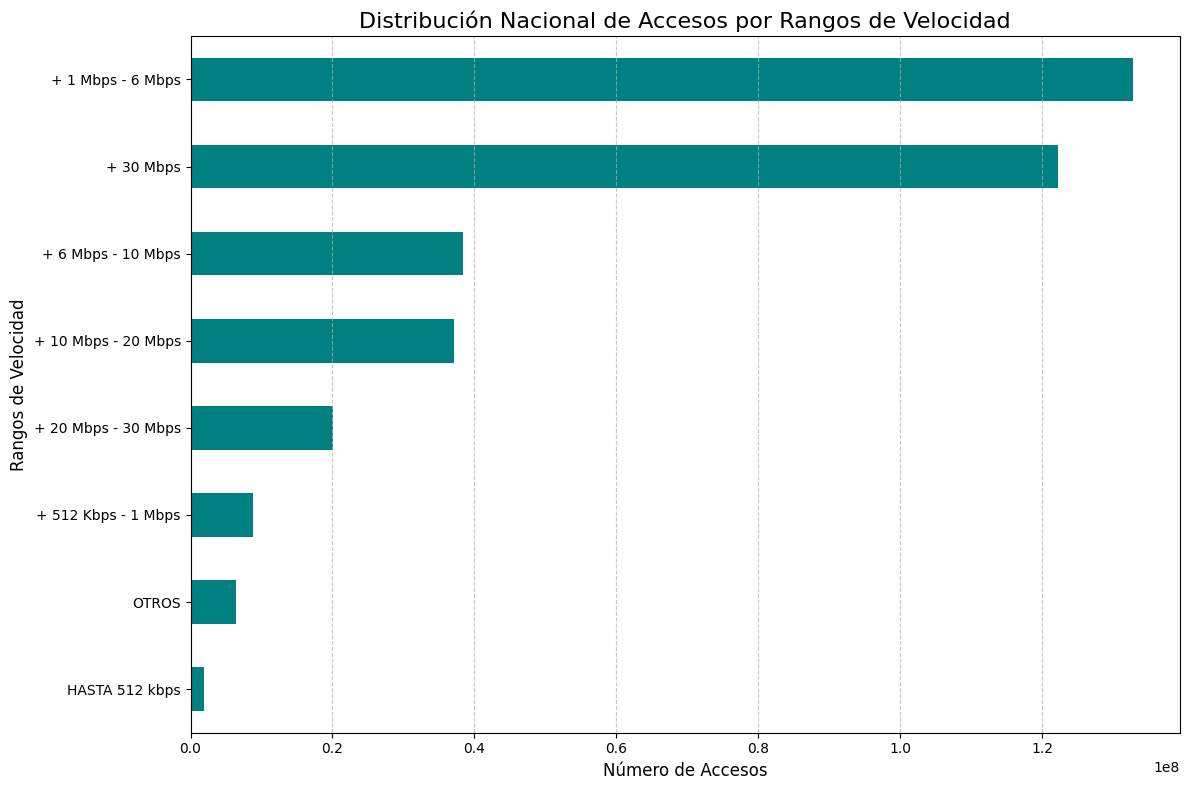

In [81]:
# Seleccionar columnas relevantes (excluyendo año, trimestre y provincia)
rangos_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
                    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
                    '+ 30 Mbps', 'OTROS']

# Sumar los accesos por rango de velocidad a nivel nacional
totales_por_rango = df_acc_por_rangos[rangos_velocidad].sum()

# Gráfico de barras horizontales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
totales_por_rango.sort_values().plot(kind='barh', color='teal')
plt.title('Distribución Nacional de Accesos por Rangos de Velocidad', fontsize=16)
plt.xlabel('Número de Accesos', fontsize=12)
plt.ylabel('Rangos de Velocidad', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\juanv\AppData\Local\Temp\ipykernel_1272\467829891.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  evolucion_rangos[['Año', 'Trimestre']].apply(lambda x: f"{x[0]}-T{x[1]}", axis=1),


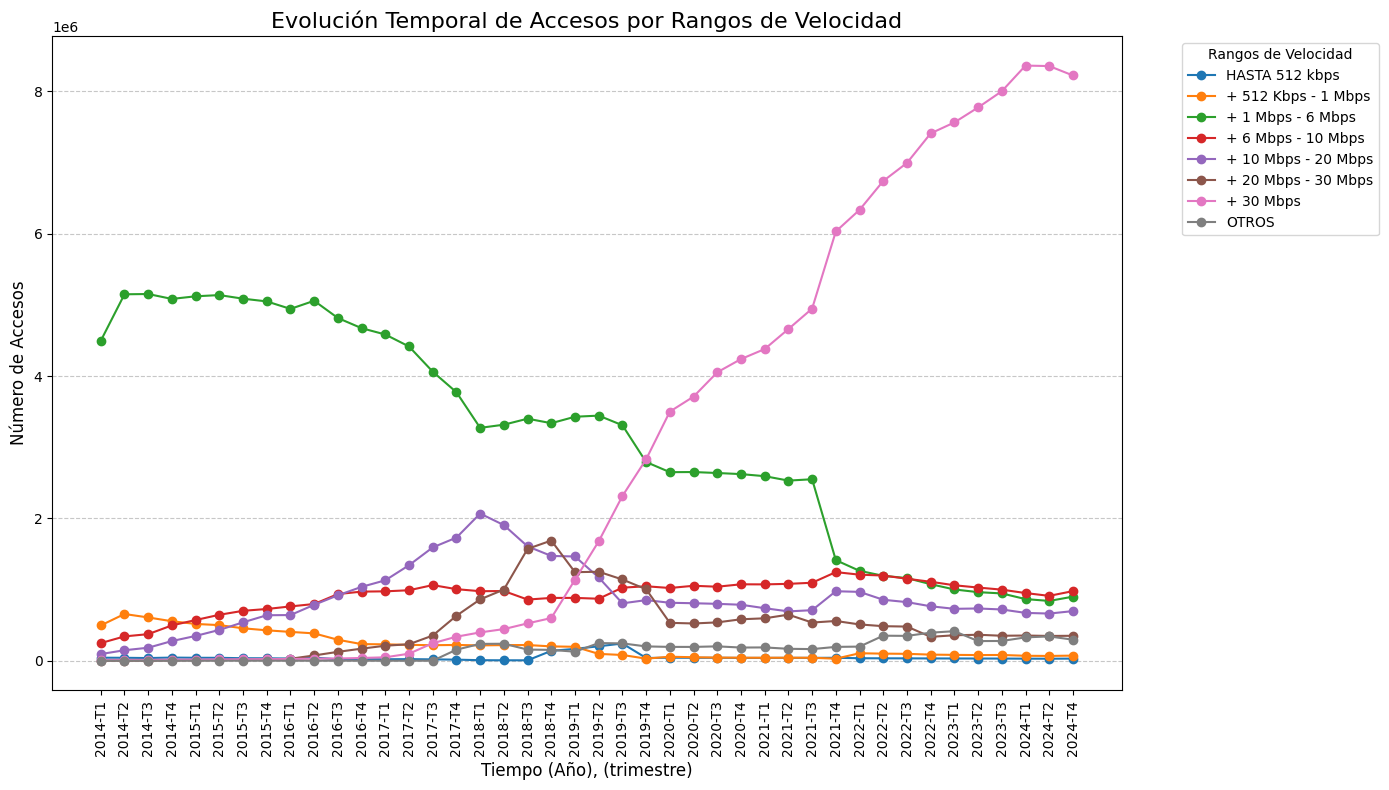

In [85]:
# Agrupar por Año y Trimestre y sumar accesos para cada rango de velocidad
evolucion_rangos = df_acc_por_rangos.groupby(['Año','Trimestre'])[rangos_velocidad].sum().reset_index()

# Gráfico de líneas
plt.figure(figsize=(14, 8))
for rango in rangos_velocidad:
    plt.plot(
        evolucion_rangos.index,
        evolucion_rangos[rango],
        label=rango,
        marker='o'
    )
plt.title('Evolución Temporal de Accesos por Rangos de Velocidad', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=12)
plt.xlabel('Tiempo (Año), (trimestre)', fontsize=12)
plt.legend(title='Rangos de Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(
    evolucion_rangos.index, 
    evolucion_rangos[['Año', 'Trimestre']].apply(lambda x: f"{x[0]}-T{x[1]}", axis=1), 
    rotation=90
)
plt.tight_layout()
plt.show()

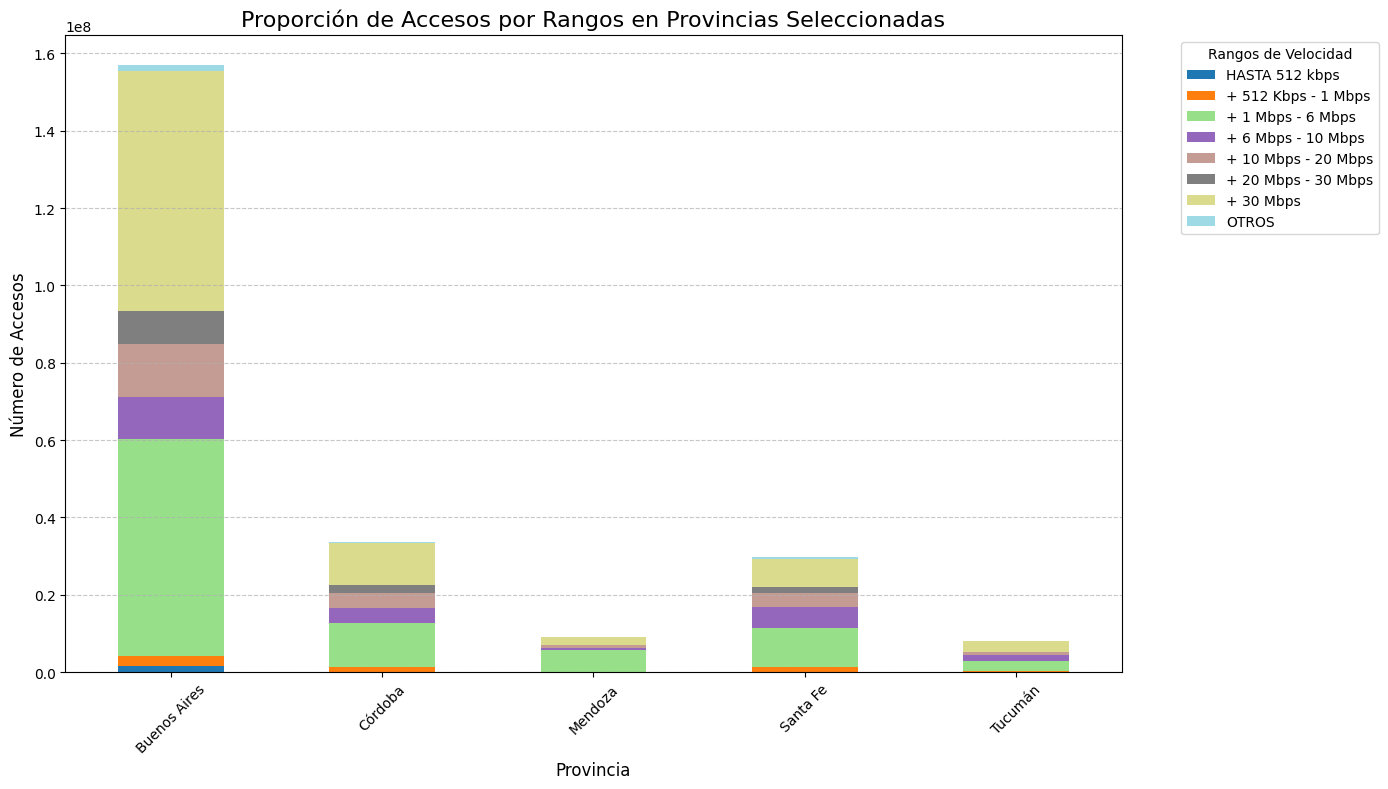

In [86]:
# Seleccionar provincias específicas para análisis detallado
provincias_seleccionadas = ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Mendoza', 'Tucumán']

# Filtrar datos por las provincias seleccionadas y agrupar por Provincia
proporcion_por_provincia_rangos = df_acc_por_rangos[df_acc_por_rangos['Provincia'].isin(provincias_seleccionadas)] \
    .groupby('Provincia')[rangos_velocidad].sum()

# Gráfico de barras apilado
proporcion_por_provincia_rangos.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'
)
plt.title('Proporción de Accesos por Rangos en Provincias Seleccionadas', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=12)
plt.xlabel('Provincia', fontsize=12)
plt.legend(title='Rangos de Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Exploramos **df_dial_baf**

In [87]:
print("Resumen del DataFrame: df_dial_baf")
df_dial_baf.info()  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_dial_baf.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_dial_baf.head())  # Primeras filas para una vista general


Resumen del DataFrame: df_dial_baf
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.5+ KB

Estadísticas descriptivas:


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
count,1992.000000,1992.000000,1992,1.992000e+03,1988.000000,1.992000e+03
unique,NaN,NaN,24,NaN,NaN,NaN
top,NaN,NaN,Buenos Aires,NaN,NaN,NaN
freq,NaN,NaN,83,NaN,NaN,NaN
mean,2018.698795,2.457831,NaN,3.650542e+05,902.104125,3.659545e+05
std,3.001697,1.122899,NaN,7.858852e+05,2281.691033,7.876088e+05
min,2014.000000,1.000000,NaN,1.219300e+04,0.000000,1.255700e+04
25%,2016.000000,1.000000,NaN,6.183400e+04,5.000000,6.223600e+04
50%,2019.000000,2.000000,NaN,1.123150e+05,137.000000,1.136630e+05
75%,2021.000000,3.000000,NaN,1.954710e+05,615.000000,1.954710e+05



Primeras filas del DataFrame:


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,2,Buenos Aires,4983480,5900.0,4989380
1,2024,2,Capital Federal,1461549,2050.0,1463599
2,2024,2,Catamarca,75073,1.0,75074
3,2024,2,Chaco,147087,5.0,147092
4,2024,2,Chubut,173366,857.0,174223


In [88]:

# Conteo de valores nulos en cada columna
print("Valores nulos en cada columna de df_acc_vel_loc_sinrangos:")
display(df_dial_baf.isnull().sum())


Valores nulos en cada columna de df_acc_vel_loc_sinrangos:


Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             4
Total               0
dtype: int64

In [89]:
df_dial_baf = df_dial_baf.dropna()

In [90]:
# Detección de registros duplicados
print("Número de registros duplicados en df_dial_baf:", df_dial_baf.duplicated().sum())


Número de registros duplicados en df_dial_baf: 982


In [91]:
# Verificar duplicados
duplicados = df_acc_por_tecnologia[df_acc_por_tecnologia.duplicated(keep=False)]
print(duplicados)

Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total]
Index: []


In [92]:
#eliminamos los duplicados redundantes
df_acc_por_tecnologia = df_acc_por_tecnologia.drop_duplicates()

### Visualizaciones y analisis

C:\Users\juanv\AppData\Local\Temp\ipykernel_1272\3337431398.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  evolucion_dial_baf[['Año', 'Trimestre']].apply(lambda x: f"{x[0]}-T{x[1]}", axis=1),


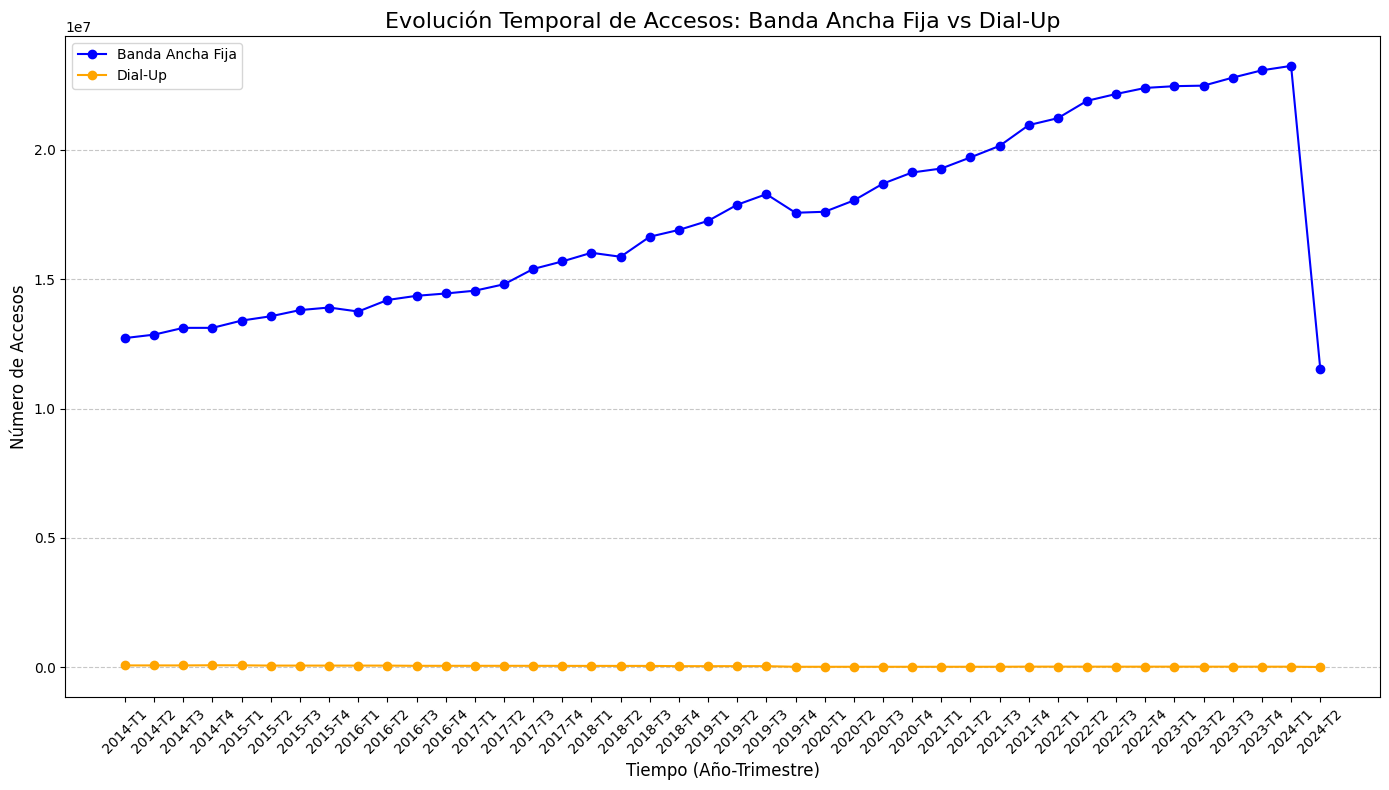

In [93]:
# Agrupar por Año y Trimestre y sumar accesos para Banda Ancha Fija y Dial-Up
evolucion_dial_baf = df_dial_baf.groupby(['Año', 'Trimestre'])[['Banda ancha fija', 'Dial up']].sum().reset_index()

# Gráfico de líneas
plt.figure(figsize=(14, 8))
plt.plot(
    evolucion_dial_baf.index,
    evolucion_dial_baf['Banda ancha fija'],
    label='Banda Ancha Fija',
    marker='o',
    color='blue'
)
plt.plot(
    evolucion_dial_baf.index,
    evolucion_dial_baf['Dial up'],
    label='Dial-Up',
    marker='o',
    color='orange'
)
plt.title('Evolución Temporal de Accesos: Banda Ancha Fija vs Dial-Up', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=12)
plt.xlabel('Tiempo (Año-Trimestre)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(
    evolucion_dial_baf.index,
    evolucion_dial_baf[['Año', 'Trimestre']].apply(lambda x: f"{x[0]}-T{x[1]}", axis=1),
    rotation=45
)
plt.tight_layout()
plt.show()

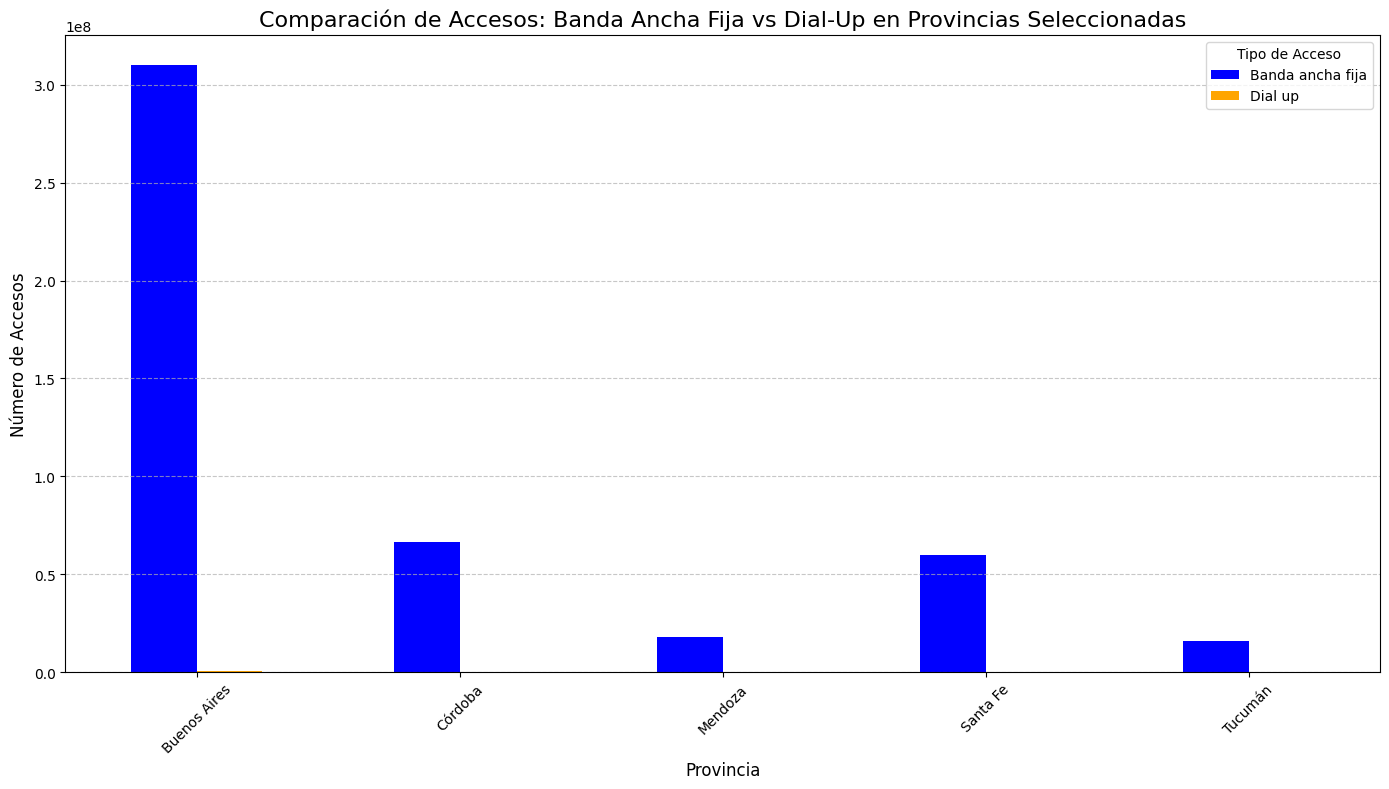

In [94]:
# Seleccionar provincias específicas para el análisis
provincias_seleccionadas = ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Mendoza', 'Tucumán']

# Filtrar datos por las provincias seleccionadas y agrupar por Provincia
accesos_por_provincia_dial_baf = df_dial_baf[df_dial_baf['Provincia'].isin(provincias_seleccionadas)] \
    .groupby('Provincia')[['Banda ancha fija', 'Dial up']].sum()

# Gráfico de barras agrupadas
accesos_por_provincia_dial_baf.plot(
    kind='bar',
    figsize=(14, 8),
    color=['blue', 'orange']
)
plt.title('Comparación de Accesos: Banda Ancha Fija vs Dial-Up en Provincias Seleccionadas', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=12)
plt.xlabel('Provincia', fontsize=12)
plt.legend(title='Tipo de Acceso', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

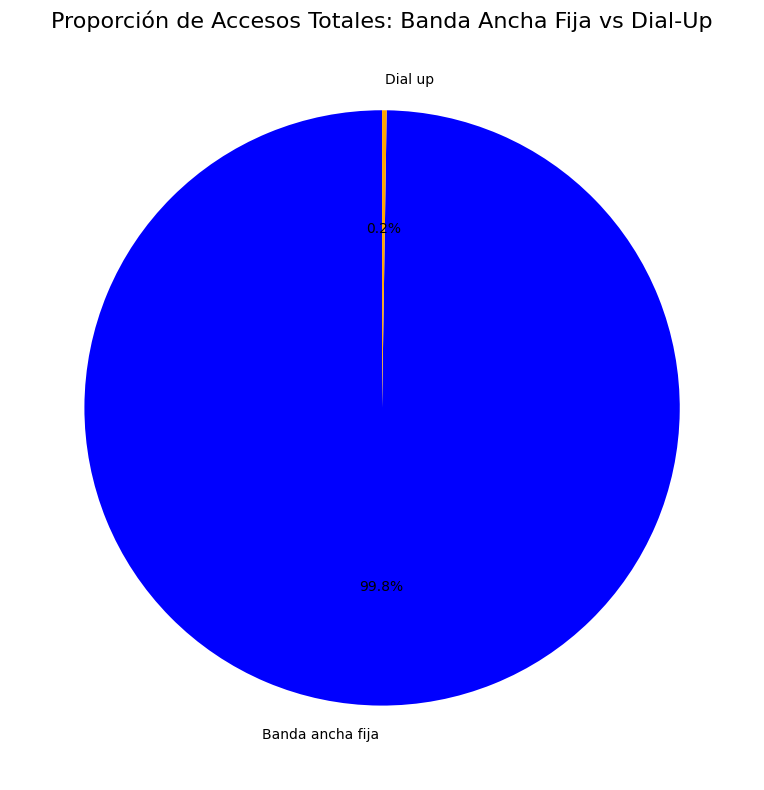

In [95]:
# Sumar los accesos totales de Banda Ancha Fija y Dial-Up a nivel nacional
proporcion_total = df_dial_baf[['Banda ancha fija', 'Dial up']].sum()

# Gráfico de pastel
proporcion_total.plot(
    kind='pie',
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'orange']
)
plt.title('Proporción de Accesos Totales: Banda Ancha Fija vs Dial-Up', fontsize=16)
plt.ylabel('')  # Quitar etiqueta del eje y
plt.tight_layout()
plt.show()

### Exploramos **df_totales_dial_baf**

In [96]:
print("Resumen del DataFrame: df_totales_dial_baf")
df_totales_dial_baf.info()  # Información general sobre el DataFrame
print("\nEstadísticas descriptivas:")
display(df_totales_dial_baf.describe(include='all'))  # Estadísticas descriptivas
print("\nPrimeras filas del DataFrame:")
display(df_totales_dial_baf.head())  # Primeras filas para una vista general


Resumen del DataFrame: df_totales_dial_baf
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int64 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB

Estadísticas descriptivas:


,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
count,42.000000,42.000000,4.200000e+01,42.000000,4.200000e+01,42
unique,NaN,NaN,NaN,NaN,NaN,42
top,NaN,NaN,NaN,NaN,NaN,Abr-Jun 2024
freq,NaN,NaN,NaN,NaN,NaN,1
mean,2018.761905,2.452381,8.794433e+06,21490.190476,8.815923e+06,NaN
std,3.074756,1.130560,1.742229e+06,10136.781243,1.733189e+06,NaN
min,2014.000000,1.000000,6.362108e+06,9991.000000,6.398398e+06,NaN
25%,2016.000000,1.250000,7.189537e+06,11793.000000,7.218131e+06,NaN
50%,2019.000000,2.000000,8.704688e+06,21802.500000,8.720658e+06,NaN
75%,2021.000000,3.000000,1.037650e+07,28593.750000,1.038873e+07,NaN



Primeras filas del DataFrame:


,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2024,2,11544314,11793,11556107,Abr-Jun 2024
1,2024,1,11621363,11793,11633156,Ene-Mar 2024
2,2023,4,11535868,11793,11547661,Oct-Dic 2023
3,2023,3,11395115,11793,11406908,Jul-Sept 2023
4,2023,2,11239781,12116,11251897,Abr-Jun 2023


In [97]:

# Conteo de valores nulos en cada columna
print("Valores nulos en cada columna de df_totales_dial_baf:")
display(df_totales_dial_baf.isnull().sum())


Valores nulos en cada columna de df_totales_dial_baf:


Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

In [98]:
# Detección de registros duplicados
print("Número de registros duplicados en df_totales_dial_baf:", df_totales_dial_baf.duplicated().sum())


Número de registros duplicados en df_totales_dial_baf: 0


### Visualizaciones y analisis

C:\Users\juanv\AppData\Local\Temp\ipykernel_1272\1395762546.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tendencia_totales[['Año', 'Trimestre']].apply(lambda x: f"{x[0]}-T{x[1]}", axis=1),


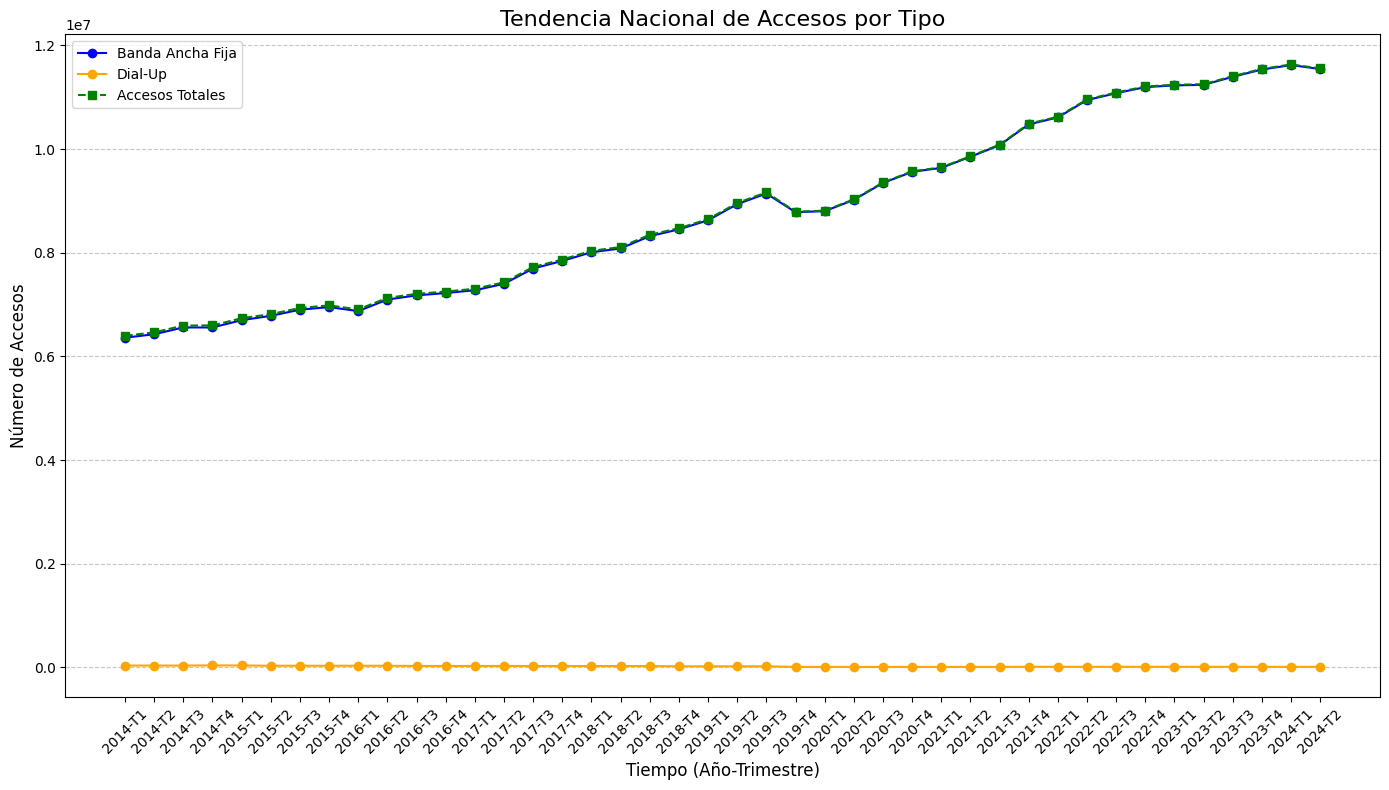

In [99]:
# Agrupar por Año y Trimestre para observar la tendencia de accesos totales
tendencia_totales = df_totales_dial_baf.groupby(['Año', 'Trimestre'])[['Banda ancha fija', 'Dial up', 'Total']].sum().reset_index()

# Gráfico de líneas para los accesos totales
plt.figure(figsize=(14, 8))
plt.plot(
    tendencia_totales.index,
    tendencia_totales['Banda ancha fija'],
    label='Banda Ancha Fija',
    marker='o',
    color='blue'
)
plt.plot(
    tendencia_totales.index,
    tendencia_totales['Dial up'],
    label='Dial-Up',
    marker='o',
    color='orange'
)
plt.plot(
    tendencia_totales.index,
    tendencia_totales['Total'],
    label='Accesos Totales',
    linestyle='--',
    marker='s',
    color='green'
)
plt.title('Tendencia Nacional de Accesos por Tipo', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=12)
plt.xlabel('Tiempo (Año-Trimestre)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(
    tendencia_totales.index,
    tendencia_totales[['Año', 'Trimestre']].apply(lambda x: f"{x[0]}-T{x[1]}", axis=1),
    rotation=45
)
plt.tight_layout()
plt.show()

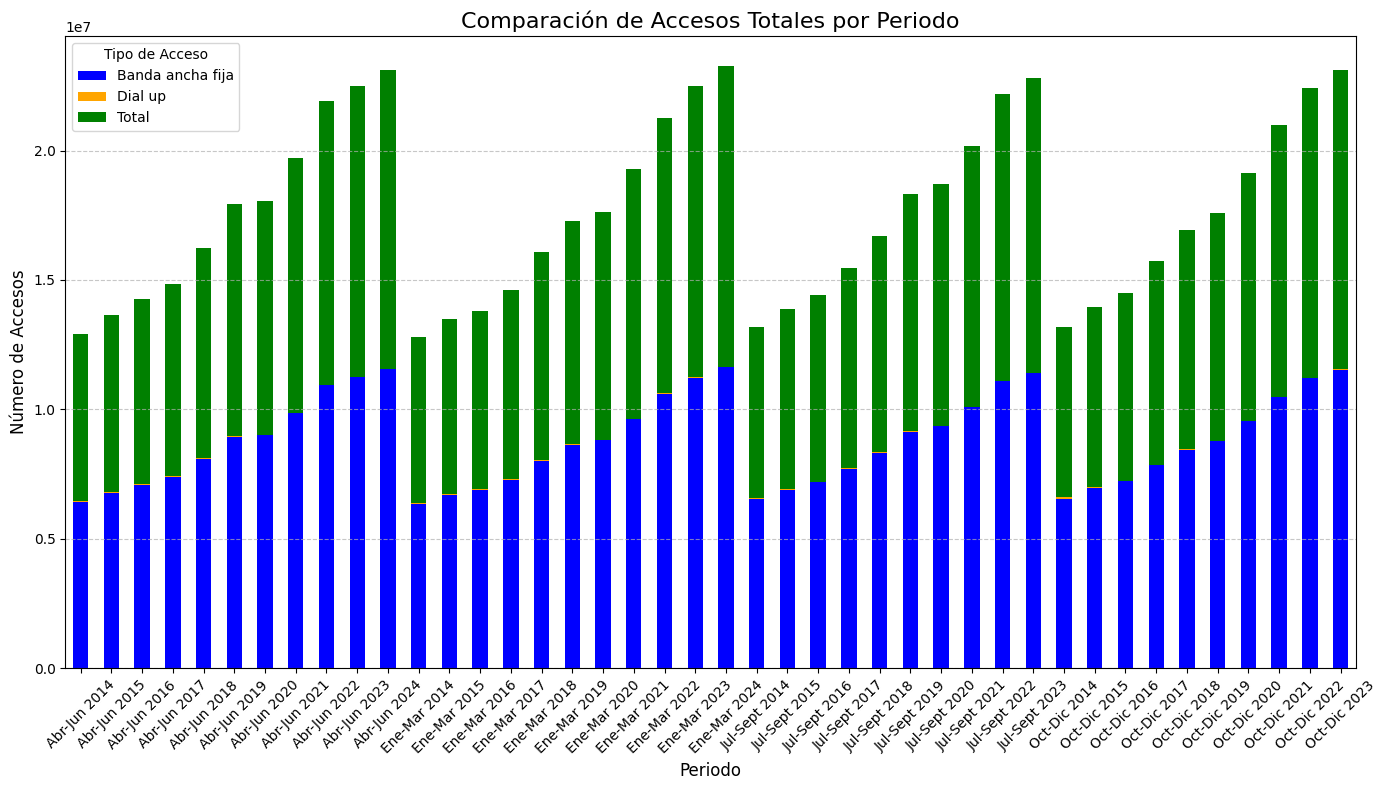

In [100]:
# Agrupar por Periodo para comparar accesos totales
accesos_por_periodo = df_totales_dial_baf.groupby('Periodo')[['Banda ancha fija', 'Dial up', 'Total']].sum()

# Gráfico de barras apiladas
accesos_por_periodo.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=['blue', 'orange', 'green']
)
plt.title('Comparación de Accesos Totales por Periodo', fontsize=16)
plt.ylabel('Número de Accesos', fontsize=12)
plt.xlabel('Periodo', fontsize=12)
plt.legend(title='Tipo de Acceso', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KPI sugerido: Porcentaje de Migración a Fibra Óptica

Este KPI mide el porcentaje de usuarios que han migrado de tecnologías tradicionales (Cablemódem, ADSL, etc.) a Fibra Óptica, evaluando el progreso de la modernización tecnológica.

Fórmula: Migración a Fibra Óptica (%) = (Accesos Fibra Óptica/ Total de Accesos) x 100

Conclusión
El KPI refleja el avance hacia la modernización tecnológica, destacando las provincias que lideran en la adopción de Fibra Óptica y aquellas que requieren mayor inversión. Esta métrica será clave para evaluar la efectividad de las estrategias de expansión y personalización.

### Extraccion

In [101]:
# Directorio donde guardar los archivos CSV
output_dir = "C:/Users/juanv/Documents/Proyecto Individual 2/Internet/PIDA/Datasets"

# Crear el directorio si no existe
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Exportar cada DataFrame limpio
df_acc_por_tecnologia.to_csv(output_dir + 'accesos_por_tecnologia.csv', index=False)
df_acc_por_rangos.to_csv(output_dir + 'accesos_por_rangos.csv', index=False)
df_dial_baf.to_csv(output_dir + 'dial_baf.csv', index=False)
df_totales_dial_baf.to_csv(output_dir + 'totales_dial_baf.csv', index=False)

df_penetracion_poblacion.to_csv(output_dir + 'penetracion_poblacion.csv', index=False)
df_penetracion_hogares.to_csv(output_dir + 'penetracion_hogares.csv', index=False)
df_penetracion_totales.to_csv(output_dir + 'penetracion_totales.csv', index=False)

df_acc_vel_loc_sinrangos.to_csv(output_dir + 'accesos_vel_loc_sinrangos.csv', index=False)
df_velocidad_sin_rangos.to_csv(output_dir + 'velocidad_sin_rangos.csv', index=False)
df_velocidad_porciento_prov.to_csv(output_dir + 'velocidad_porciento_prov.csv', index=False)
print("Todos los DataFrames se han exportado exitosamente a la carpeta:", output_dir)


Todos los DataFrames se han exportado exitosamente a la carpeta: C:/Users/juanv/Documents/Proyecto Individual 2/Internet/PIDA/Datasets
